# Part I - Prosper Loan Data Exploration
## by Vince Conca

## Introduction
> The data explored in this exercise concerns Prosper. Prosper is an online peer-to-peer lending marketplace, where creditworthly borrowers can request a loan and investors can invest in “notes” (or portions) of each loan\*. The datset contains 113,937 loans with 81 variables on each loan. Definitions for the 81 variables can be found in a downloadable file: [Variable Definitions](../ref/prosperLoanDataVariableDefinitions.xlsx)

&emsp; &emsp; &emsp; &emsp; \* from (www.prosper.com)

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
#create dataframe
df = pd.read_csv('../data/prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [8]:
#view initial size
df.shape

(113937, 81)

In [9]:
#view info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [10]:
#view basic stats
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [11]:
#view any columns that have null values
print(df.columns[df.isnull().any()])
#count number of columns with null values
print('\nThere are:', (df.isnull().sum() > 0).sum(), 'columns containing null values.')

Index(['CreditGrade', 'ClosedDate', 'BorrowerAPR', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'GroupKey',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOne

In [12]:
#check for duplicates
df.duplicated().sum()

0

### What is the structure of your dataset?

> There are 113937 rows and 81 columns. 81 columns is far too many and they will be cut down to those pertinent to this specific exploration. 43 variables contain null values and null columns will need to be checked once again after the dataset is trimmed down. There are no duplicate rows in the entire dataset. There are bound to be outliers, which will be addressed during EDA. Lastly, none of the columns are of 'category' datatype and those better suited as 'category' will need to be converted.

### What is/are the main feature(s) of interest in your dataset?

> The primary question I'd like to dive into is, what main factors/individual metrics contribute to Prosper's self-prescribed risk rating for potential Borrowers. As a bonus/extra investigation, I'd like to see how a Borrower's risk rating impacts approved loans through the lens of potential Investors by looking at the relationship between Borrower risk and their loan and Investor possible return.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main variables I feel are important to Prosper's risk score are the customer's credit score (Prosper uses a lower and upper range, so for simplicity sake, I'll use the mean of the 2 instead), delinquencies, debt to income ratio, open lines of credit, revolving credit balance, and monthly income. For the Borrower's risk score and how that may impact loans and in turn, how that may impact Investors, I think looking at some main loan properties such as APR, term, and loan amount would be useful and of course, the estimated return is of key import to Investors.

## Cleaning

### To get the data set to a useful state, I'll:
* Remove unneeded columns
* Create any needed new columns
* Use only Borrowers that have a current source of income and also customers that never had a Prosper loan in the past (removing circumstantial criteria that may skew what we're trying to answer)
* Address null values, if any, and if necessary...
* ...convert any columns to appropriate data types
* Outliers will be addressed during Univariate investigation

In [13]:
#copy the dataframe for cleaning
prosper = df.copy()

The dataset has far too many columns, trimming down to columns that for sure will be needed and also a few columns that may/may not be needed.

In [14]:
#select desired columns
prosper = df.loc[:, ['BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentDelinquencies',
                     'DebtToIncomeRatio', 'EmploymentStatus', 'EstimatedReturn', 'LoanOriginalAmount', 'OpenCreditLines',
                    'ProsperPrincipalBorrowed', 'ProsperScore', 'RevolvingCreditBalance', 'StatedMonthlyIncome',
                    'Term']]

In [15]:
#view result
prosper.columns

Index(['BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'CurrentDelinquencies', 'DebtToIncomeRatio', 'EmploymentStatus',
       'EstimatedReturn', 'LoanOriginalAmount', 'OpenCreditLines',
       'ProsperPrincipalBorrowed', 'ProsperScore', 'RevolvingCreditBalance',
       'StatedMonthlyIncome', 'Term'],
      dtype='object')

The mean of CreditScoreRangeLower and CreditScoreRangeUpper will be condensed into a single 'credit_score' column. 

In [16]:
#create new column
prosper['credit_score'] = (prosper['CreditScoreRangeLower'] + prosper['CreditScoreRangeUpper']) / 2

In [17]:
#confirm added column
prosper.head()

,BorrowerAPR,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentDelinquencies,DebtToIncomeRatio,EmploymentStatus,EstimatedReturn,LoanOriginalAmount,OpenCreditLines,ProsperPrincipalBorrowed,ProsperScore,RevolvingCreditBalance,StatedMonthlyIncome,Term,credit_score
0,0.16516,640.0,659.0,2.0,0.17,Self-employed,NaN,9425,4.0,NaN,NaN,0.0,3083.333333,36,649.5
1,0.12016,680.0,699.0,0.0,0.18,Employed,0.05470,10000,14.0,NaN,7.0,3989.0,6125.000000,36,689.5
2,0.28269,480.0,499.0,1.0,0.06,Not available,NaN,3001,NaN,NaN,NaN,NaN,2083.333333,36,489.5
3,0.12528,800.0,819.0,4.0,0.15,Employed,0.06000,10000,5.0,NaN,9.0,1444.0,2875.000000,36,809.5
4,0.24614,680.0,699.0,0.0,0.26,Employed,0.09066,15000,19.0,11000.0,4.0,6193.0,9583.333333,36,689.5


In [18]:
#drop the columns used to create the new column
prosper.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1, inplace=True)

In [19]:
#verify columns were dropped
prosper.head(3)

,BorrowerAPR,CurrentDelinquencies,DebtToIncomeRatio,EmploymentStatus,EstimatedReturn,LoanOriginalAmount,OpenCreditLines,ProsperPrincipalBorrowed,ProsperScore,RevolvingCreditBalance,StatedMonthlyIncome,Term,credit_score
0,0.16516,2.0,0.17,Self-employed,NaN,9425,4.0,NaN,NaN,0.0,3083.333333,36,649.5
1,0.12016,0.0,0.18,Employed,0.0547,10000,14.0,NaN,7.0,3989.0,6125.000000,36,689.5
2,0.28269,1.0,0.06,Not available,NaN,3001,NaN,NaN,NaN,NaN,2083.333333,36,489.5


Any customer that had a Prosper loan in the past will be removed since that field is unique to Prosper only and I'm only interested in the metrics that could influence a Borrower's risk score from any financial institution.

In [20]:
#create copy to work with
prior_loan = prosper

In [21]:
#find number of Borrowers with a value in prior loan column (meaning they had a previous loan)
prior_loan['ProsperPrincipalBorrowed'].notnull().sum()

22085

In [22]:
#get null entries
null_mask = prior_loan['ProsperPrincipalBorrowed'].isnull()

In [23]:
#apply mask to df to keep True values (keep null values) and remove False values (remove any that have a value) 
prior_loan = prior_loan[null_mask]

In [24]:
#resulting df contains only the null values (Borrowers that never had a loan)
prior_loan['ProsperPrincipalBorrowed'].notnull().sum()

0

In [25]:
#apply changes to main df and reset index since rows were deleted
prosper = prior_loan.reset_index(drop=True)

In [26]:
#view df
prosper.head()

,BorrowerAPR,CurrentDelinquencies,DebtToIncomeRatio,EmploymentStatus,EstimatedReturn,LoanOriginalAmount,OpenCreditLines,ProsperPrincipalBorrowed,ProsperScore,RevolvingCreditBalance,StatedMonthlyIncome,Term,credit_score
0,0.16516,2.0,0.17,Self-employed,NaN,9425,4.0,NaN,NaN,0.0,3083.333333,36,649.5
1,0.12016,0.0,0.18,Employed,0.05470,10000,14.0,NaN,7.0,3989.0,6125.000000,36,689.5
2,0.28269,1.0,0.06,Not available,NaN,3001,NaN,NaN,NaN,NaN,2083.333333,36,489.5
3,0.12528,4.0,0.15,Employed,0.06000,10000,5.0,NaN,9.0,1444.0,2875.000000,36,809.5
4,0.15425,0.0,0.36,Employed,0.07077,15000,17.0,NaN,10.0,62999.0,8333.333333,60,749.5


Since all Borrowers in the data now have never had a Prosper loan in the past, we can drop the column indicating as much.

In [27]:
#drop column
prosper.drop(['ProsperPrincipalBorrowed'], axis=1, inplace=True)

In [28]:
#view remaining columns
prosper.columns

Index(['BorrowerAPR', 'CurrentDelinquencies', 'DebtToIncomeRatio',
       'EmploymentStatus', 'EstimatedReturn', 'LoanOriginalAmount',
       'OpenCreditLines', 'ProsperScore', 'RevolvingCreditBalance',
       'StatedMonthlyIncome', 'Term', 'credit_score'],
      dtype='object')

Now we'll narrow down to Borrowers that have a current income. This is being done to set a more level population.

In [29]:
#create copy to work with
cash_flow = prosper

In [30]:
#view current types
cash_flow['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

A lot can be inferred into the above entries on whether or not a person has a steady income, but removing the rows of: Not available, Other, Not employed, Retired, and null values should leave those with a current/active income.

In [31]:
#remove rows for each no income type
no_income = ['Not available', 'Other', 'Not employed', 'Retired']
for source in no_income:
    cash_flow.drop(cash_flow[cash_flow['EmploymentStatus'] == source].index, inplace=True)

In [32]:
#confirm changes
cash_flow['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Full-time', nan, 'Part-time'],
      dtype=object)

In [33]:
#apply changes to main df and reset index since rows were deleted
prosper = cash_flow.reset_index(drop=True)

nan was returned when checking column entries, those need to be removed.

In [34]:
#get count of null
prosper['EmploymentStatus'].isnull().sum()

2255

In [35]:
#drop null
prosper = prosper.dropna(subset=['EmploymentStatus']).reset_index(drop=True)
#confirm no nulls
prosper['EmploymentStatus'].isnull().sum()

0

In [36]:
#view df
prosper.head()

,BorrowerAPR,CurrentDelinquencies,DebtToIncomeRatio,EmploymentStatus,EstimatedReturn,LoanOriginalAmount,OpenCreditLines,ProsperScore,RevolvingCreditBalance,StatedMonthlyIncome,Term,credit_score
0,0.16516,2.0,0.17,Self-employed,NaN,9425,4.0,NaN,0.0,3083.333333,36,649.5
1,0.12016,0.0,0.18,Employed,0.05470,10000,14.0,7.0,3989.0,6125.000000,36,689.5
2,0.12528,4.0,0.15,Employed,0.06000,10000,5.0,9.0,1444.0,2875.000000,36,809.5
3,0.15425,0.0,0.36,Employed,0.07077,15000,17.0,10.0,62999.0,8333.333333,60,749.5
4,0.31032,0.0,0.27,Employed,0.11070,3000,7.0,2.0,5812.0,2083.333333,36,689.5


For this particular investigation, I'm not concerned with the source of a customer's income, just that they have one. So, now that we've removed all the rows we want, we're left with a column that simply reflects there is a source of income and since we don't care from where, the column can be removed.

In [37]:
#drop column
prosper.drop(['EmploymentStatus'], axis=1, inplace=True)

In [38]:
#confirm final list of columns
prosper.columns

Index(['BorrowerAPR', 'CurrentDelinquencies', 'DebtToIncomeRatio',
       'EstimatedReturn', 'LoanOriginalAmount', 'OpenCreditLines',
       'ProsperScore', 'RevolvingCreditBalance', 'StatedMonthlyIncome', 'Term',
       'credit_score'],
      dtype='object')

Now we have the final columns, I'll rename them to make them visually easier to read.

In [39]:
#rename columns
prosper = prosper.rename(columns = {'BorrowerAPR':'borrower_apr', 'CurrentDelinquencies':'current_delinquencies',
                         'DebtToIncomeRatio':'debt_income_ratio', 'EstimatedReturn':'estimated_return',
                         'LoanOriginalAmount':'loan_amount', 'OpenCreditLines':'open_loc',
                         'ProsperScore':'risk_score', 'RevolvingCreditBalance':'revolving_credit_bal',
                          'StatedMonthlyIncome':'monthly_income', 'Term':'term'
                         }         
              ) 

In [40]:
#confirm renaming
prosper.columns

Index(['borrower_apr', 'current_delinquencies', 'debt_income_ratio',
       'estimated_return', 'loan_amount', 'open_loc', 'risk_score',
       'revolving_credit_bal', 'monthly_income', 'term', 'credit_score'],
      dtype='object')

In [41]:
#view size again
prosper.shape

(79721, 11)

We can finish cleaning now that the final set of columns is ready to go.

In [42]:
#check df for nulls
prosper.isnull().sum()

borrower_apr                 0
current_delinquencies       18
debt_income_ratio         5387
estimated_return         18637
loan_amount                  0
open_loc                     1
risk_score               18637
revolving_credit_bal         1
monthly_income               0
term                         0
credit_score                 0
dtype: int64

Being that the dataset is ~80k rows, deleting the null values for current_delinquencies, open_loc, and revolving_credit_bal will have minimal impact.

In [43]:
#remove null rows from columns with small number of null
null_vals = ['current_delinquencies', 'open_loc', 'revolving_credit_bal']
for null_val in null_vals:
    prosper = prosper.dropna(subset=[null_val])

In [44]:
#confirm change
prosper.isnull().sum()

borrower_apr                 0
current_delinquencies        0
debt_income_ratio         5369
estimated_return         18618
loan_amount                  0
open_loc                     0
risk_score               18618
revolving_credit_bal         0
monthly_income               0
term                         0
credit_score                 0
dtype: int64

In [45]:
#reset index since we just deleted rows via the function
prosper = prosper.reset_index(drop=True)

Per the column definitions, if debt to income ratio has a null value, then Prosper simply was not able to capture that data point. We can either delete those rows or fill with the mean or median.

In [46]:
#create copy to work with
dir_null = prosper

<Axes: >

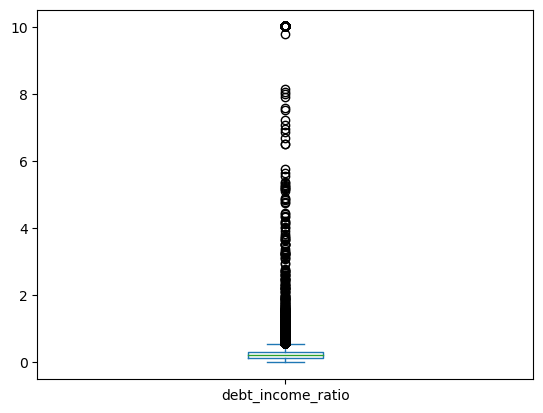

In [47]:
#quick boxplot of debt to income column
dir_null['debt_income_ratio'].plot(kind = 'box')

The boxplot shows almost all our debt to income data points are below 1 with a bunch of outliers more than liekly skewing the mean.

In [48]:
#get mean and median
print('The mean = ', dir_null['debt_income_ratio'].mean())
print('The median = ', dir_null['debt_income_ratio'].median())

The mean =  0.2670352333418536
The median =  0.22


Calculating the upper value to comapre the mean/median to.

In [49]:
#calculate quartile values
q1 = dir_null['debt_income_ratio'].quantile(0.25)
q3 = dir_null['debt_income_ratio'].quantile(0.75)
#calculate interquartile range
iqr = q3 - q1
#calculate upper value
upper_val = q3 + (1.5 * iqr)
print('The upper value is:', upper_val)

The upper value is: 0.565


In [50]:
#view how many data points are above the boxplot upper value
dir_null[dir_null['debt_income_ratio'] > upper_val]['debt_income_ratio'].count()

1880

1880 data points could be considered as outliers and are impacting the mean since they are so much larger in value (even though 1880 is only ~3% of the dataset), so using the Median to fill the null values makes a little more sense. Deleting nulls is still an option, too, however nulls represent ~7% of the total dataset and that's a bit too many to delete and not impact the investigation.

On a side note, I think it's important to keep the outliers in the dataset, they can always be ignored in EDA, so I'll keep the 1880 data points as well.

In [51]:
#fill nan with median
dir_null['debt_income_ratio'].fillna(int(dir_null['debt_income_ratio'].median()), inplace=True)

In [52]:
#check impact to dataset mean (not really any reason to at this point, I was just curious)
dir_null['debt_income_ratio'].mean()

0.24904682442096815

The mean went from .267 to .249

In [53]:
#apply changes to main df
prosper = dir_null

In [54]:
#check remaining null values
prosper.isnull().sum()

borrower_apr                 0
current_delinquencies        0
debt_income_ratio            0
estimated_return         18618
loan_amount                  0
open_loc                     0
risk_score               18618
revolving_credit_bal         0
monthly_income               0
term                         0
credit_score                 0
dtype: int64

Per the column definitions, estimated return and Prosper risk score did not exist prior to July 2009. Being that both those columns have identical null values, the null values are prior to when those metrics were created. Prosper Score is critical to our main investigation and estimated return is for the secondary investigation. Therefore, it wouldn't make sense to fill that many empty values with any measures of center, so I feel it's best to remove those rows leaving ~61k rows to analyze, representing data after July 2009.

In [55]:
#drop null rows
prosper.dropna(inplace=True)

In [56]:
#verify changes
prosper.isnull().sum()

borrower_apr             0
current_delinquencies    0
debt_income_ratio        0
estimated_return         0
loan_amount              0
open_loc                 0
risk_score               0
revolving_credit_bal     0
monthly_income           0
term                     0
credit_score             0
dtype: int64

More rows were deleted, so the index needs to be reset yet again.

In [57]:
#reset index
prosper = prosper.reset_index(drop=True)

In [58]:
#check size again
prosper.shape

(61084, 11)

Finally, we can check the datatypes and make sure they are what is needed

In [59]:
#view data types
prosper.dtypes

borrower_apr             float64
current_delinquencies    float64
debt_income_ratio        float64
estimated_return         float64
loan_amount                int64
open_loc                 float64
risk_score               float64
revolving_credit_bal     float64
monthly_income           float64
term                       int64
credit_score             float64
dtype: object

Visually, term and the risk score probably should be categories, but I\'ll run a quick check.

In [60]:
#check each column for number of unique entries, set threshold high to be conservative
category_threshold = 20
for column in prosper.columns:
    if prosper[column].nunique() < category_threshold:
        print(column, 'has', prosper[column].nunique(), 'different values')

risk_score has 11 different values
term has 3 different values
credit_score has 13 different values


Oddly, per the column definitions, Prosper's risk score should range from 1 - 10, so having 11 values doesn't align with the definitions.

It's also strange credit score would have so few values, but first, we'll look into risk score.

In [61]:
#create copy to work with
score = prosper

In [62]:
score['risk_score'].value_counts()

risk_score
4.0     9768
6.0     9272
8.0     8781
7.0     7993
5.0     7107
3.0     5585
9.0     4899
2.0     3913
10.0    2992
11.0     610
1.0      164
Name: count, dtype: int64

Before proceeding any further, I will remove the decimal from the values as it serves no purpose.

In [63]:
score['risk_score'] = score['risk_score'].astype(int)

With that out of the way, we see there are 610 scores of '11'. Best guess is those '11's should be '1's instead (possibly due to data entry errors?). Also, there are only 164 '1's which is only ~5% of the next lowest figure. This makes me think there should be more '1's and those '11's are actually a score of '1'. To confirm, I'll take a quick gander at the other data for those that are 11 and compre to scores of 10.

In [64]:
score[score['risk_score'] == 11].head(3)

,borrower_apr,current_delinquencies,debt_income_ratio,estimated_return,loan_amount,open_loc,risk_score,revolving_credit_bal,monthly_income,term,credit_score
6,0.07620,0.0,0.25,0.04231,10000,16.0,11,9906.0,3333.333333,36,829.5
123,0.13799,0.0,0.11,0.06388,30000,16.0,11,55769.0,33333.333333,36,729.5
131,0.06726,0.0,0.14,0.04261,9000,11.0,11,4242.0,4083.333333,36,829.5


In [65]:
score[score['risk_score'] == 10].head(3)

,borrower_apr,current_delinquencies,debt_income_ratio,estimated_return,loan_amount,open_loc,risk_score,revolving_credit_bal,monthly_income,term,credit_score
2,0.15425,0.0,0.36,0.07077,15000,17.0,10,62999.0,8333.333333,60,749.5
31,0.11695,0.0,0.21,0.06030,25000,10.0,10,42592.0,7458.333333,60,789.5
49,0.12216,0.0,0.10,0.07620,25000,7.0,10,22554.0,10000.000000,60,789.5


Visually comparing the few entries for risk scores of 10 and riusk scores of 11, it actually seems more like 11 is a legitimate score, the best possible (least risky). The values for 11 are similar or better for key metrics such as APR and credit score than those scoring 10. This does lead me to believe that a score of 11 exists despite the definitions claiming it does not. I will go ahead and leave the 11 in the dataset as is.

The other observation that seemed off was credit score only has 13 different values.

In [66]:
score['credit_score'].unique()

array([689.5, 809.5, 749.5, 709.5, 829.5, 649.5, 669.5, 729.5, 789.5,
       769.5, 849.5, 869.5, 889.5])

Initially, the limited number of values made no sense since there's 550 whole numbers in the credit score range (300 - 850). But, after seeing the actual values and looking at the definitions again, Prosper doesn't use actual credit scores in their data. Rather, they use buckets that represent an upper range and a lower range. When I condensed those two columns into an average column, it stands to reason the resulting number of values would be limited and all end with a .5. 

I do want them ordered for plotting and since there are only 13 different values, I'll go ahead and convert them to a category as well. First, I'll remove the decimal since it's the same for each value and only clutters the value.

In [67]:
#drop decimal
score['credit_score'] = score['credit_score'].astype(int)

In [68]:
#apply the two small changes (removing decimals in the two score columns) to main df
prosper = score

Converting term, Prosper risk score, and credit score columns to category type.

In [69]:
#create copy to work with
cat_convert = prosper

In [70]:
#function to convert columns to category
def col_convert(col):
    cat_order = cat_convert[col].unique() #get column values
    cat_order.sort() #sort column values
   
    new_cat = pd.CategoricalDtype(ordered=True, categories=cat_order) #create new category
    
    cat_convert[col] = cat_convert[col].astype(new_cat) #convert current category to new category

In [71]:
#send columns needing category conversion to function
cols_to_convert = ['term', 'risk_score', 'credit_score']
for col in cols_to_convert:
    col_convert(col)

In [72]:
#verify change
cat_convert.dtypes

borrower_apr              float64
current_delinquencies     float64
debt_income_ratio         float64
estimated_return          float64
loan_amount                 int64
open_loc                  float64
risk_score               category
revolving_credit_bal      float64
monthly_income            float64
term                     category
credit_score             category
dtype: object

In [73]:
#apply changes to main df
prosper = cat_convert

In [74]:
#view results and current state of data
prosper.head(1)

,borrower_apr,current_delinquencies,debt_income_ratio,estimated_return,loan_amount,open_loc,risk_score,revolving_credit_bal,monthly_income,term,credit_score
0,0.12016,0.0,0.18,0.0547,10000,14.0,7,3989.0,6125.0,36,689


There is also no need to have decimals for current delinquencies and open lines of credit.

In [75]:
#dict of columns to convert to remove decimal
col_convert = {'current_delinquencies': int, 'open_loc': int}
#convert columns
prosper = prosper.astype(col_convert)

In [76]:
#view changes
prosper.head(3)

,borrower_apr,current_delinquencies,debt_income_ratio,estimated_return,loan_amount,open_loc,risk_score,revolving_credit_bal,monthly_income,term,credit_score
0,0.12016,0,0.18,0.05470,10000,14,7,3989.0,6125.000000,36,689
1,0.12528,4,0.15,0.06000,10000,5,9,1444.0,2875.000000,36,809
2,0.15425,0,0.36,0.07077,15000,17,10,62999.0,8333.333333,60,749


Another minor observation, revolving credit balance all seem to end in .0. If that\'s the case, we may as well remove the decimal there too.

In [77]:
#count rows
prosper.shape

(61084, 11)

In [78]:
#count number of times values in revolving credit balance end in .0
num_rev_cred_bal = prosper['revolving_credit_bal'].astype(str).str.endswith('.0').sum()
print(num_rev_cred_bal)

61084


The rows = the number of times revolving credit balance ends in .0, so we can just get rid of the decimal.

In [79]:
#convert to get rid of the decimal
prosper['revolving_credit_bal'] = prosper['revolving_credit_bal'].astype(int)

In [80]:
#view changes
prosper.head()

,borrower_apr,current_delinquencies,debt_income_ratio,estimated_return,loan_amount,open_loc,risk_score,revolving_credit_bal,monthly_income,term,credit_score
0,0.12016,0,0.18,0.05470,10000,14,7,3989,6125.000000,36,689
1,0.12528,4,0.15,0.06000,10000,5,9,1444,2875.000000,36,809
2,0.15425,0,0.36,0.07077,15000,17,10,62999,8333.333333,60,749
3,0.31032,0,0.27,0.11070,3000,7,2,5812,2083.333333,36,689
4,0.23939,0,0.24,0.09840,10000,6,4,1260,3355.750000,36,709


Finally, monthly income can be rounded to 2 decimal places to make it easier to work with.

In [81]:
#round monthly income to 2 decimals
prosper['monthly_income'] = prosper['monthly_income'].round(2)

In [82]:
#view changes
prosper.head()

,borrower_apr,current_delinquencies,debt_income_ratio,estimated_return,loan_amount,open_loc,risk_score,revolving_credit_bal,monthly_income,term,credit_score
0,0.12016,0,0.18,0.05470,10000,14,7,3989,6125.00,36,689
1,0.12528,4,0.15,0.06000,10000,5,9,1444,2875.00,36,809
2,0.15425,0,0.36,0.07077,15000,17,10,62999,8333.33,60,749
3,0.31032,0,0.27,0.11070,3000,7,2,5812,2083.33,36,689
4,0.23939,0,0.24,0.09840,10000,6,4,1260,3355.75,36,709


Dataset is clean and ready for plotting exercises.

In [83]:
#save cleaned df to file
prosper.to_csv('../result/prosperLoanData_clean.csv', index=False)  

In [84]:
#save cleaned df to pickle file to preserve category data types for Part 2
prosper.to_pickle('../result/prosperLoanData_clean.pkl')  

## Univariate Exploration

In univariate analysis, I'll take a look at the Prosper risk score first and then each variable I selected, one by one, as having a potential impact to its calculation.
* Debt to Income Ratio (DTI)
* Current Delinquencies
* Open Lines of Credit (LOC)
* Revolving Credit Balance
* Monthly Income
* Credit Score

First, I'll take a look at the main metric we're interested in, Prosper risk score.

##### Prosper's Risk Score

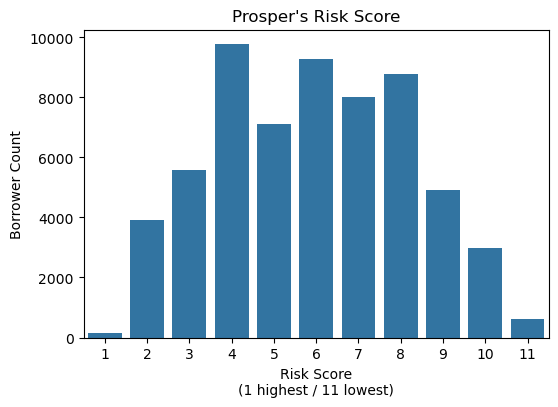

In [85]:
#set plot layout
fig, ax = plt.subplots(figsize=(6, 4))

#creaete plot
ax = sns.countplot(data=prosper, x='risk_score', color='tab:blue')

#plot attributes
plt.title('Prosper\'s Risk Score')
plt.xlabel('Risk Score\n(1 highest / 11 lowest)')
plt.ylabel('Borrower Count')

plt.show()

A somewhat normalized plot, with a slight skew towards higher risk scores (lower number), which is an expected result. P2P lending models are typically geard more towards riskier Borrowers.

Next I'll look at each of the other metrics that were indentified as most likely having some measure of impact to Prosper's risk score (debt to income ratio, delinquencies, open lines of credit, revolving credit balance, monthly income, and credit score).

First, from here on out, we'll most likely be modifying the cleaned Prosper dataset, so I'll create a copy for us to work with as we go through the rest of the investigation.

In [86]:
#make a copy for updated columns
prosper_updated = prosper

##### Debt to Income Ratio (DTI)

In [87]:
#view what we're working with
prosper_updated['debt_income_ratio'].describe()

count    61084.000000
mean         0.229486
std          0.291477
min          0.000000
25%          0.130000
50%          0.210000
75%          0.300000
max         10.010000
Name: debt_income_ratio, dtype: float64

The vast majority of the 61k rows are well below a value of 1. There must be a subset of Borrowers well above the typical DTI. 

In [88]:
#count how many rows are over 1
prosper_updated[prosper_updated['debt_income_ratio'] > 1]['debt_income_ratio'].count()

179

179 of the 61k have more debt than their income (greater than 1) with the max being 10x their income. Before I do anything with the possible outliers, I'll view the entire population first.

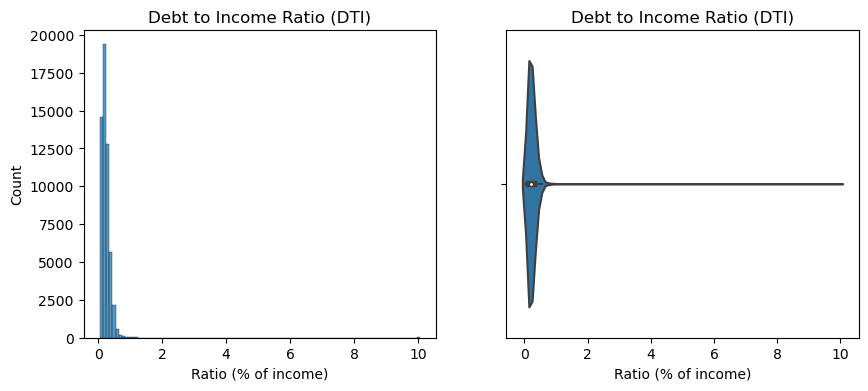

In [89]:
#set plot layout
plt.figure(figsize=(10, 4))

#create plot 1

#define plot 1 arguments
bin_step = .1
bins = np.arange(0.05, prosper_updated['debt_income_ratio'].max() + bin_step, bin_step)

#set position and create plot 1
plt.subplot(1, 2, 1)
sns.histplot(data=prosper_updated, x='debt_income_ratio', bins=bins, color='tab:blue')

#plot 1 attributes
plt.title('Debt to Income Ratio (DTI)')
plt.xlabel('Ratio (% of income)')
plt.ylabel('Count')


#set position and create plot 2
plt.subplot(1, 2, 2)
sns.violinplot(data=prosper_updated, x='debt_income_ratio', color='tab:blue')

#plot 2 attributes
plt.title('Debt to Income Ratio (DTI)')
plt.xlabel('Ratio (% of income)')

# Show the plots
plt.show()

Neither plot is super useful in the current state, however they both clearly show the vast majority of Borrowers have a DTI under 1 with a right skew that quickly declines. The US national DTI average is only .10 (10% of income) for 2023, so what we see here is expected and those 179 really skew the plot. Also, values over 1 would be extremely rare and not indicative of the typical Prosper loan (or any loan) Borrower.

179 is a small number and I do think it is safe to remove them from the data.

In [90]:
#create subset of values under 1
dti_subset = prosper_updated.loc[prosper['debt_income_ratio'] < 1]

In [91]:
#view subset to see what we're working with
dti_subset['debt_income_ratio'].describe()

count    60903.000000
mean         0.219402
std          0.133692
min          0.000000
25%          0.130000
50%          0.210000
75%          0.300000
max          0.990000
Name: debt_income_ratio, dtype: float64

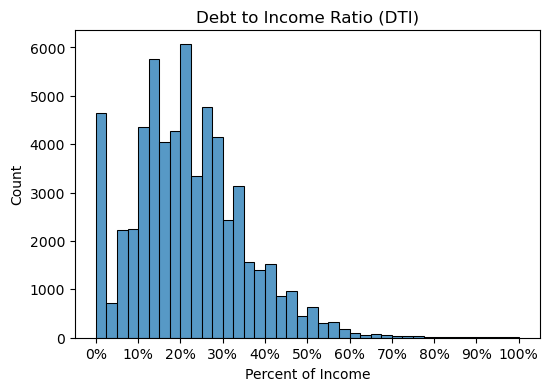

In [92]:
#set plot layout
fig, ax = plt.subplots(figsize=(6, 4))

#define plot arguments
bin_step = .025
bins = np.arange(0., dti_subset['debt_income_ratio'].max() + bin_step, bin_step)

#create plot
sns.histplot(data=dti_subset, x='debt_income_ratio', bins=bins, color='tab:blue')

#plot attributes
plt.title('Debt to Income Ratio (DTI)')
plt.xlabel('Percent of Income')
x_ticks = np.arange(0, 1.1, .1) #create ticks on x axis
x_labels = [str(int(i * 100)) + '%' for i in x_ticks] #format ticks
plt.xticks(x_ticks, x_labels)
plt.ylabel('Count')

plt.show()

A much better view of the results. Most of the customers fall between 15% and 20% with a solid subset with zero or just above zero. The 15%-20% is above the national average of 10%, but again, not surprising since the P2P loan model is geared towards those less likely to qualify for a regular bank loan.

Since we modified the debt to income ratio column, we need to update the main dataframe and reset the index.

In [93]:
#update debt to income ratio column
prosper_updated = dti_subset.reset_index(drop=True)

In [94]:
#confirm updated dataframe
prosper_updated['debt_income_ratio'].describe()

count    60903.000000
mean         0.219402
std          0.133692
min          0.000000
25%          0.130000
50%          0.210000
75%          0.300000
max          0.990000
Name: debt_income_ratio, dtype: float64

##### Delinquencies

In [95]:
#view what we're working with
prosper_updated['current_delinquencies'].describe()

count    60903.000000
mean         0.283287
std          0.980546
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: current_delinquencies, dtype: float64

The above leads one to believe a vast majority of the data points are 0 and we have some serious outliers, much like debt to income ratio.

In [96]:
#view sum of delinquencies for each number of delinquencies; order by delinquency variable, rather than count
prosper_updated['current_delinquencies'].value_counts().sort_index()

current_delinquencies
0     51897
1      5569
2      1748
3       663
4       396
5       191
6       134
7        93
8        58
9        48
10       28
11       24
12       16
13       13
14        6
15        3
16        7
17        5
18        2
21        2
Name: count, dtype: int64

We do see a huge % of customers have no delinquencies. We'll plot this for visual representation.

First, I'm setting up the below functions when I need to center tick labels on a histogram. 

In [97]:
#function to move ticks from the edge to the middle of a bin
def hist_bin_center(bins):
    bin_center = 0.5 * (bins[:-1] + bins[1:]) 
    return bin_center

In [98]:
#function to drop the .5 from the ticks when they are moved to the middle (only needed if labels aren't being overwritten)
def hist_tick_labels(bin_center):
    tick_labels = [(x - .5).astype(int) for x in bin_center] #drop the decimal
    return tick_labels

Before plotting current delinquencies, a bar chart or countplot may be better, but since the number of delinquencies can technically be infinite, I went with the histogram.

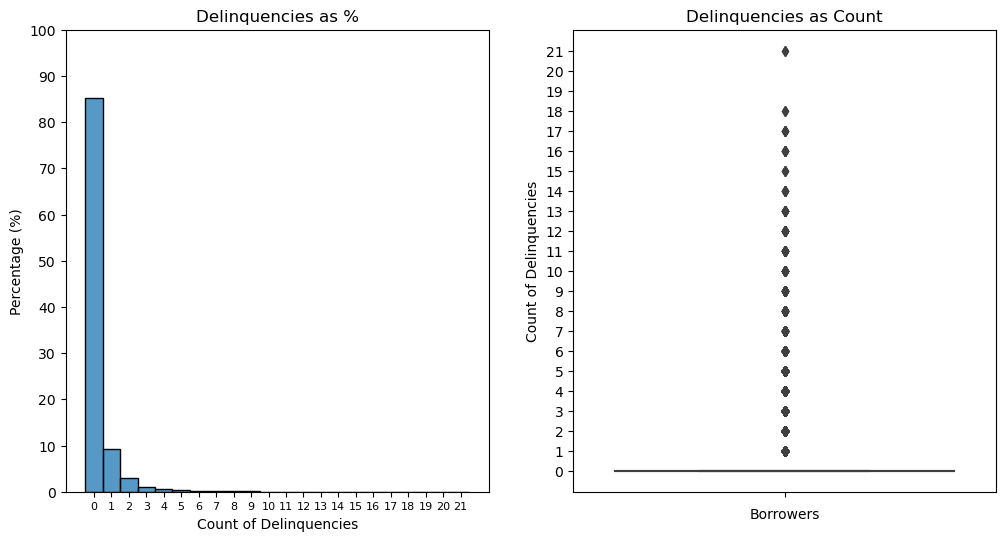

In [99]:
#set plot layout
fig, ax = plt.subplots(figsize=(12, 6))

#create plot 1

#define plot 1 arguments
bin_step = 1
bins = np.arange(0, prosper_updated['current_delinquencies'].max() + 2, bin_step)

#set position and create plot 1
plt.subplot(1, 2, 1)
ax = sns.histplot(data=prosper_updated, x='current_delinquencies', bins=bins, stat='percent', color='tab:blue')

#plot 1 attributes
bin_center = hist_bin_center(bins)
tick_labels = hist_tick_labels(bin_center)
plt.xticks(bin_center, tick_labels, fontsize=8)
plt.yticks(np.arange(0, 101, 10))
plt.title('Delinquencies as %')
plt.xlabel('Count of Delinquencies')
plt.ylabel('Percentage (%)')


#set position and create plot 2
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=prosper_updated, y='current_delinquencies', color='tab:blue')

#plot 2 attributes
plt.yticks(np.arange(0, 22, 1))
plt.title('Delinquencies as Count')
plt.xlabel('Borrowers')
plt.ylabel('Count of Delinquencies')

# Show the plots
plt.show()

The first plot shows the percentage of customers with a delinquency. ~85% have none and another ~10% have 1. The second plot indicates that having a delinquency, whether it's 1 or 21, is outside the normal range of the data. 

In [100]:
#get number of 0; get number of greater than 0; calculate actual % of customers with no delinquent accounts
zero_count = prosper_updated.loc[prosper_updated['current_delinquencies'] == 0]['current_delinquencies'].count()
rest_count = prosper_updated.loc[prosper_updated['current_delinquencies'] > 0]['current_delinquencies'].count()
percent_zero = zero_count / (zero_count + rest_count)
print(percent_zero)

0.8521255110585686


The calculation confirms the visual, that 85% have no delinquencies. As a result of this particular investigation and going off what the box plot indicates are outliers, I'll no longer use current delinquencies in exploring the impact to Prosper's risk score. There is no need to remove them from the data as it may impact the other metrics.

##### Open lines of credit

In [101]:
#view what we're working with
prosper_updated['open_loc'].describe()

count    60903.000000
mean         9.523981
std          4.903888
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         54.000000
Name: open_loc, dtype: float64

Again, it appears we have significant outliers for open lines of credit.

Similar to current delinquencies, a bar chart or count plot (or really, any categorical ordinal friendly plot) may be better, but since open lines of credit can also, technically, be infinite, I went ahead with a histogram again.

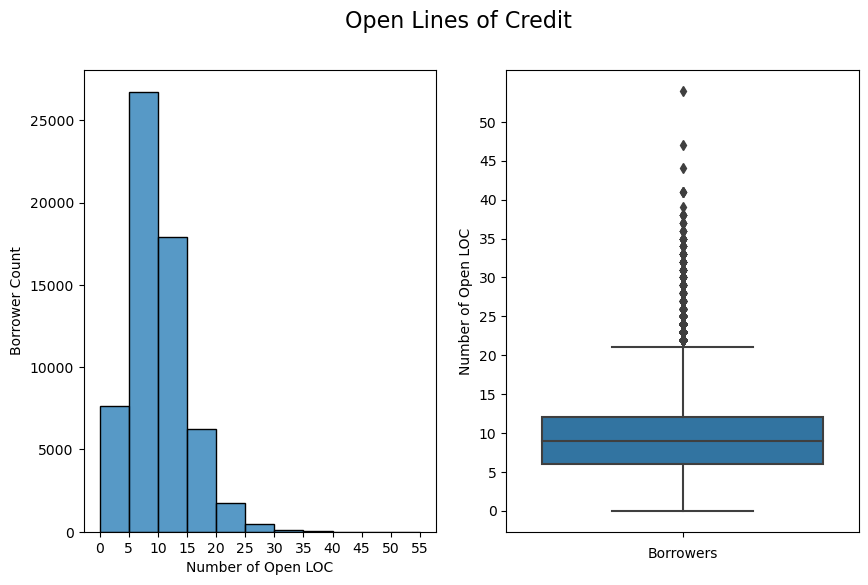

In [102]:
#set plot layout
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Open Lines of Credit', fontsize=16)

#create plot 1

#define plot 1 arguments
bin_step = 5
bins = np.arange(0, prosper_updated['open_loc'].max() + bin_step, bin_step)

#set position and create plot 1
plt.subplot(1, 2, 1)
ax = sns.histplot(data=prosper_updated, x='open_loc', bins=bins, color='tab:blue')

#plot 1 attributes
plt.xticks(np.arange(0, prosper_updated['open_loc'].max() + bin_step, 5))
plt.xlabel('Number of Open LOC')
plt.ylabel('Borrower Count')


#set position and create plot 2
plt.subplot(1, 2, 2)
ax = sns.boxplot(data=prosper_updated, y='open_loc', color='tab:blue')

#plot 2 attributes
plt.yticks(np.arange(0, 55, 5))
plt.xlabel('Borrowers')
plt.ylabel('Number of Open LOC')

# Show the plots
plt.show()

Much like debt to income ratio, a subset will serve us better. The first plot shows most Borrowers have under 30 LOCs and using the second plot, we can narrow down to ~22 that fall within a normal range of open LOCs. But, we'll get a more specif via code.

In [103]:
#calculate quartile values
q1 = prosper_updated['open_loc'].quantile(0.25)
q3 = prosper_updated['open_loc'].quantile(0.75)
#calculate interquartile range
iqr = q3 - q1
#calculate upper value
upper_val = q3 + (1.5 * iqr)
print('The upper value is:', upper_val)

The upper value is: 21.0


21 and under is the cutoff we will go with.

In [104]:
#create subset for <= to cutoff
open_loc_threshold = 21
open_loc_subset = prosper_updated.loc[prosper_updated['open_loc'] <= open_loc_threshold]

In [105]:
#view the subset
open_loc_subset['open_loc'].describe()

count    59448.000000
mean         9.141149
std          4.265135
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         21.000000
Name: open_loc, dtype: float64

Text(0, 0.5, 'Borrower Count')

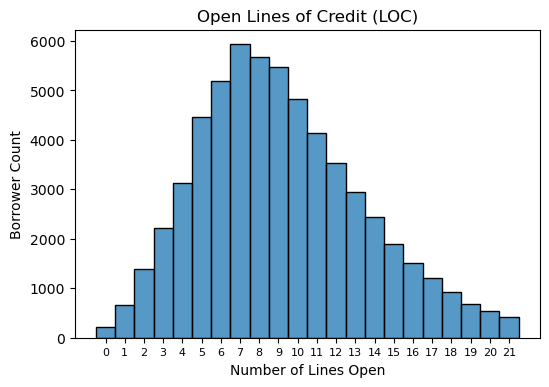

In [106]:
#set plot layout
fig, ax = plt.subplots(figsize=(6, 4))

#define plot arguments
bin_step = 1
bins = np.arange(0, open_loc_subset['open_loc'].max() + 2, bin_step)

#create plot
ax = sns.histplot(data=open_loc_subset, x='open_loc', bins=bins, color='tab:blue')

#plot attributes
bin_center = hist_bin_center(bins)
tick_labels = hist_tick_labels(bin_center)
plt.xticks(bin_center, tick_labels, fontsize=8)
plt.title('Open Lines of Credit (LOC)')
plt.xlabel('Number of Lines Open')
plt.ylabel('Borrower Count')

The plot is right skewed with most Borrowers having 7 open lines of credit. There is nothing unusual about this as most banking institutions typically prefer more lines than fewer with five or six being the ideal amount. I'm curious to see how the very high numbers affect risk score...which we'll see in bivariate investigation.

In [107]:
#update open lines of credit column
prosper_updated = open_loc_subset.reset_index(drop=True)

In [108]:
#confirm updated dataframe
prosper_updated['open_loc'].describe()

count    59448.000000
mean         9.141149
std          4.265135
min          0.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         21.000000
Name: open_loc, dtype: float64

##### Revolving credit balance

In [109]:
#view what we're working with
prosper_updated['revolving_credit_bal'].describe()

count     59448.000000
mean      17782.964995
std       30166.792941
min           0.000000
25%        4055.000000
50%        9485.000000
75%       20296.500000
max      999165.000000
Name: revolving_credit_bal, dtype: float64

Once again, the data appears to have outliers that will skew the metric's reliability.

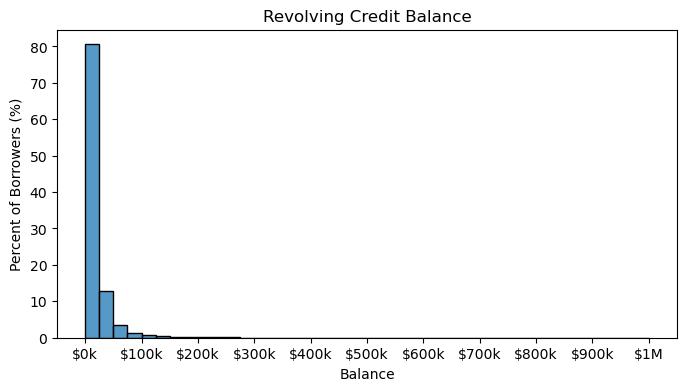

In [110]:
#set plot layout
fig, ax = plt.subplots(figsize=(8, 4))

#define plot arguments
bin_step = 25000
bins = np.arange(0, prosper_updated['revolving_credit_bal'].max() + bin_step, bin_step)

#create plot
ax = sns.histplot(data=prosper_updated, x='revolving_credit_bal', stat='percent', bins=bins, color='tab:blue')

#plot attributes
x_ticks = (np.arange(0, 1000000 + 1, 100000)) #set ticks
x_labels = ['$' + str(i // 1000) + 'k' if i != 1000000 else '$1M' for i in x_ticks] #format ticks
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.title('Revolving Credit Balance')
plt.xlabel('Balance')
plt.ylabel('Percent of Borrowers (%)')

plt.show()

The plot confirms what .describe() indicated; almost the entire dataset falls within \$100k of revolving credit balance. We probably can safely omit the top 5%, but I'll get more precise.

NOTE: While doing my supplemental nightly learning, I stumbled on an interesting way to look for outliers via using the quantile method, employing that method now to compliment the above plot.

In [111]:
#view quantiles
prosper_updated['revolving_credit_bal'].quantile(np.arange(0, 1.05, .05))

0.00         0.00
0.05       299.00
0.10      1028.00
0.15      1966.00
0.20      3064.00
0.25      4055.00
0.30      5008.00
0.35      5958.00
0.40      7015.80
0.45      8177.00
0.50      9485.00
0.55     10988.85
0.60     12748.20
0.65     14704.55
0.70     17225.80
0.75     20296.50
0.80     24448.00
0.85     30263.95
0.90     39732.90
0.95     59075.50
1.00    999165.00
Name: revolving_credit_bal, dtype: float64

Double checking with the above code, we do have a huge \$ range in the last 5%. The first 95% fall within having ~\\$60k of revolving credit balance with the last 5% having a whopping range of ~\\$940k.

I'll get more precise, yet, by plotting the top 5% (95% - 100%).

In [112]:
#get the value at 95%
quant_95 = int(prosper_updated['revolving_credit_bal'].quantile(.95))
print(quant_95)

59075


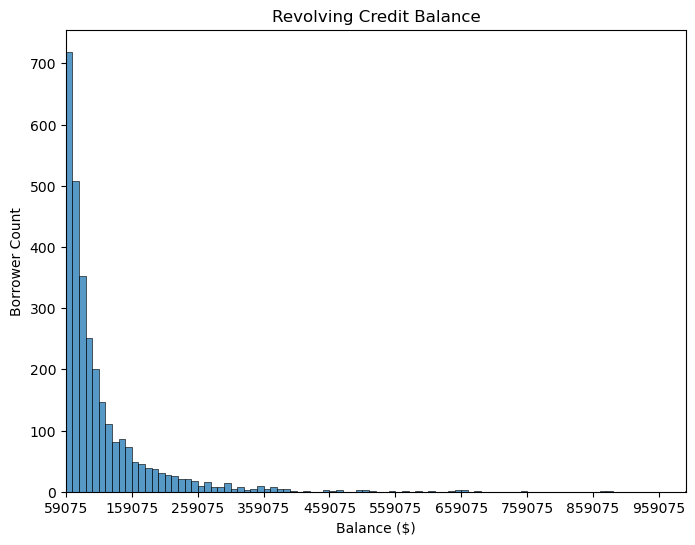

In [113]:
#set plot layout
fig, ax = plt.subplots(figsize=(8, 6))

#define plot arguments
bin_step = 10000
bins = np.arange(quant_95, prosper_updated['revolving_credit_bal'].max() + bin_step, bin_step)

#create plot
ax = sns.histplot(data=prosper_updated, x='revolving_credit_bal', bins=bins, color='tab:blue')

#plot attributes
plt.xlim(quant_95, 1000000)
plt.xticks(np.arange(quant_95, 1000000, 100000))
plt.title('Revolving Credit Balance')
plt.xlabel('Balance ($)')
plt.ylabel('Borrower Count')

plt.show()

It looks like we have a decent number of Borrowers within the first tick range. I'll zoom in even further.

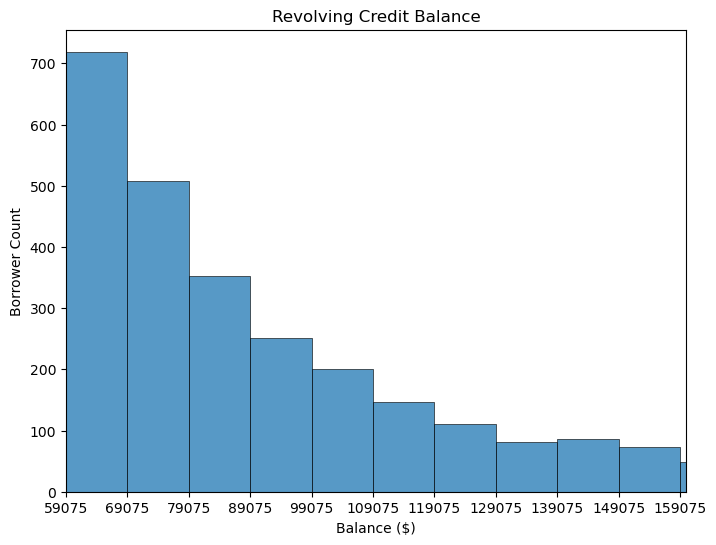

In [114]:
#set plot layout
fig, ax = plt.subplots(figsize=(8, 6))

#define plot arguments
bin_step = 10000
bins = np.arange(quant_95, prosper_updated['revolving_credit_bal'].max() + bin_step, bin_step)

#create plot
ax = sns.histplot(data=prosper_updated, x='revolving_credit_bal', bins=bins, color='tab:blue')

#plot attributes
plt.xlim(quant_95, 160000)
plt.xticks(np.arange(quant_95, 160000, 10000))
plt.title('Revolving Credit Balance')
plt.xlabel('Balance ($)')
plt.ylabel('Borrower Count')

plt.show()

To include a bit more relevant data and exclude the huge outlier values, I'll add an additional ~\$30,000 to the 95% value of \\$59,000. This gives us a \\$90,000 cutoff point to use as our data for revolving credit balance.

In [115]:
#create subset for the plot
revolving_cb_threshold = 90000
revolving_cb_subset = prosper_updated.loc[prosper_updated['revolving_credit_bal'] <= revolving_cb_threshold]

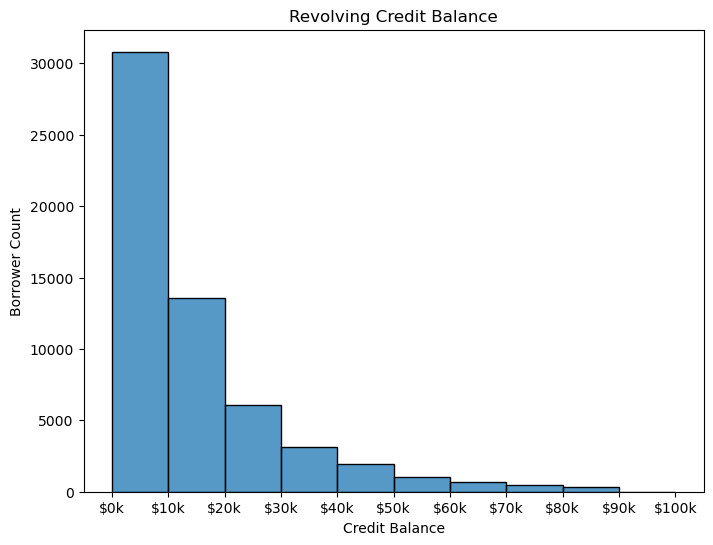

In [116]:
#set plot layout
fig, ax = plt.subplots(figsize=(8, 6))

#define plot arguments
bin_step = 10000
bins = np.arange(0, revolving_cb_subset['revolving_credit_bal'].max() + 20000, bin_step)

#create plot
ax = sns.histplot(data=revolving_cb_subset, x='revolving_credit_bal', bins=bins, color='tab:blue')

#plot attributes
plt.title('Revolving Credit Balance')
plt.xlabel('Credit Balance')
x_ticks = np.arange(0, 110000, 10000) #create ticks on x axis
x_labels = ['$' + str(i // 1000) + 'k' for i in x_ticks] #format ticks
plt.xticks(x_ticks, x_labels)
plt.ylabel('Borrower Count')

plt.show()

A much better view and nothing surprising here. As credit balance increases, the number of Borrowers with higher balances decreases. I'll be curious to see how the really high dollar amounts impact the risk score when we get to bivariate.

In [117]:
#update revolving credit balance column
prosper_updated = revolving_cb_subset.reset_index(drop=True)

In [118]:
#confirm updated dataframe
prosper_updated['revolving_credit_bal'].describe()

count    58074.000000
mean     14414.220546
std      15607.285579
min          0.000000
25%       3939.000000
50%       9176.000000
75%      19103.000000
max      89935.000000
Name: revolving_credit_bal, dtype: float64

##### Monthly income

In [119]:
#view what we're working with
prosper_updated['monthly_income'].describe().apply(lambda x: format(x, 'f')) #force non-scientific notation view

count      58074.000000
mean        5930.197257
std         9365.366410
min            0.000000
25%         3541.670000
50%         5000.000000
75%         7083.330000
max      1750002.920000
Name: monthly_income, dtype: object

A viloin plot was chosen to change things up a bit, after all, this is a bootcamp project to practice things learned :)

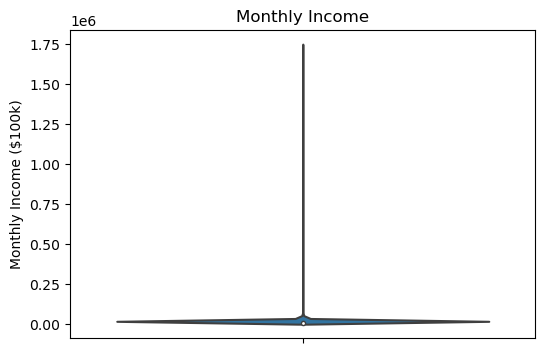

In [120]:
#set plot layout
fig, ax = plt.subplots(figsize=(6, 4))

#create plot
ax = sns.violinplot(data=prosper_updated, y='monthly_income', color='tab:blue')

#plot attributes
plt.title('Monthly Income')
plt.ylabel('Monthly Income ($100k)')

plt.show()

Again, we have outliers messing with the data/plots. The code indicated as much as well.

I'll view by quantile (note: first time I did this I used np.arange to create a quantile range of 5% buckets, but it was very clear there was a massive discrepency at the last 5%, so to fine tune, I hard coded the range that was most useful visually).

In [121]:
prosper_updated['monthly_income'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, .99, 1])

0.00          0.00
0.10       2583.33
0.20       3333.33
0.30       3833.33
0.40       4416.67
0.50       5000.00
0.60       5833.33
0.70       6666.67
0.80       7750.00
0.90      10000.00
0.99      19166.67
1.00    1750002.92
Name: monthly_income, dtype: float64

99% of the data falls within a reasonable range, maxing out at ~\$20k a month. Though, that is nearly a quarter million a year, it's not outlandish relative to the top 1% of the data, especially when compared to the max overall value of \\$175k a month or over \\$2M a year. In a P2P leanding model, the typical customer certainly would not have an income that high and even though \\$20k a month is pushing it as a typical customer, I think it's reasonable to keep those customers in the data. 

Also, the top 1% has a range of ~\$155,000 which is almost 8 times the previous 99%.

For these reasons, I will omit the top 1% and draw the line at a monthly income of ~\\$21000.

In [122]:
#get monthly income value at cutoff
income_threshold = .99
quant_99 = int(prosper_updated['monthly_income'].quantile(income_threshold))
print(quant_99)

19166


In [123]:
#create subset for the plot
monthly_income_subset = prosper_updated[prosper_updated['monthly_income'] <= quant_99]

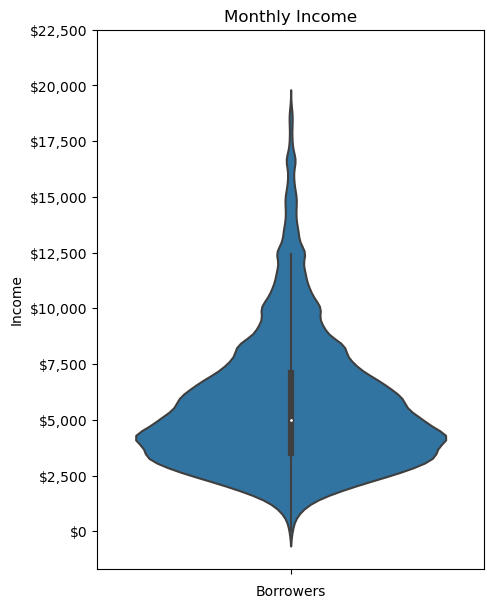

In [124]:
#set plot layout
fig, ax = plt.subplots(figsize=(5, 7))

#create plot
ax = sns.violinplot(data=monthly_income_subset, y='monthly_income', color='tab:blue')

#plot attributes
plt.title('Monthly Income')
plt.xlabel('Borrowers')
plt.ylabel('Income')
plt.yticks(np.arange(0, 23000, 2500))
y_tick_loc, _ = plt.yticks() #get tick locations, ignore lables
y_labels = ['$' + str(f'{i:,d}') for i in y_tick_loc] #format ticks
plt.yticks(y_tick_loc, y_labels)

plt.show()

The plot is much more useful simply removing the top 1%. Most borrowers have, roughly, a \$4k per month income or ~\\$50k a year. Again, this aligns with what one would expect from a typical borrower using a P2P leanding model.

In [125]:
#update monthly income column
prosper_updated = monthly_income_subset.reset_index(drop=True)

In [126]:
#confirm updated dataframe
prosper_updated['monthly_income'].describe()

count    57481.000000
mean      5635.556130
std       2935.916971
min          0.000000
25%       3500.000000
50%       5000.000000
75%       7083.330000
max      19154.170000
Name: monthly_income, dtype: float64

##### Credit Score

In [127]:
#view what we're working with
prosper_updated['monthly_income'].describe().apply(lambda x: format(x, 'f')) #force non-scientific notation view

count    57481.000000
mean      5635.556130
std       2935.916971
min          0.000000
25%       3500.000000
50%       5000.000000
75%       7083.330000
max      19154.170000
Name: monthly_income, dtype: object

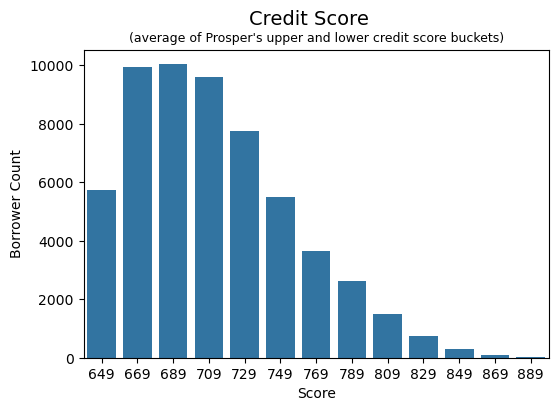

In [128]:
#set plot layout
fig, ax = plt.subplots(figsize=(6, 4))

#create plot
ax = sns.countplot(data=prosper_updated, x='credit_score', color=sns.color_palette()[0]);

#plot attributes
fig.suptitle('Credit Score', fontsize=14)
plt.title("(average of Prosper's upper and lower credit score buckets)", fontsize=9)
plt.xlabel("Score")
plt.ylabel("Borrower Count")

plt.show()

Since we know Prosper uses a lower and upper credit score range and I condensed that into an average, there's only 13 possible values or "buckets" and no need to deal with any outliers as we want them all.

The plot shows most of the Borrowers range from 669 to 709 with a long right skew. The main two credit entities, FICO and Vantage, view that range of scores as 'Good', which is in line with the typical person (Experian states 67% of people have 'Good' credit). The first bin in our plot is considered 'Fair' and no Borrower is below that. Credit scores start at 300, so with no Prosper score being below 649, that tells me 649 must be the mimimum score to receive a Prosper loan. Also, per FICO/Vantage, scores over 780 are defined as 'Excellent' or 'Exceptional' and we'd expect fewer and fewer Borrowers in those buckets as scores increase, which we see. 

### This concludes Univariate analysis

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As seen throughought the above process, there were many outliers in just about all variables and some were extreme. I did perform many transformations to weed out those outliers. Summary below:
> * Debt to Income Ratio (DTI): ~180 outliers removed; any above a DTI of 1 was removed as a max 1:1 DTI is a good representation of a typical potential P2P Borrower. 
> * Current Delinquencies: Decided to not use this metric in further analysis; 85% had zero delinquencies and the rest were spread out from 1 to 21, though, a good amount had 1 or 2. I ended up deciding I'd just omit this metric once I saw the box plot suggested more than 0 was an outlier.
> * Open Lines of Credit (LOC): ~1450 outliers removed; I kept the threshold pretty high on this metric (21), using the box plot as a guide, I'm curious to see how this impacts the risk score in Bivariate analysis. 
> * Revolving Credit Balance: ~1375 outliers removed; again I set the threshold pretty high to ensure the remaining data represented a wide range of Borrowers, but at the same time, keeping it realistic by remvoing the outliers that were extrememly high.
> * Monthly Income: ~600 outliers removed; this was a straightforward investigation, it was more of an arbitrary call on my part where to draw the line, I'm more interested in those making, at most, ~\$250k a year and below. So, those removed had an exceptionally high income.
> * Credit Score: No outliers removed as this was a categorical variable with the limits set during data cleaning.

> With the outliers removed, the resulting distributions weren't all too surprising and what one would expect from a P2P loan model containing a wide range of Borrower types.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> See above summary! I will add that I did find rather interesting the large number of super high outliers in most of the selected data. I'm thinking this is due to the nature of the P2P lending model. Not being a financial institution with member accounts, where to be a member or have an existing account one would need to fit certain conditions up front. For that reason, a traditional lending model (bank/credit union) would have significant outliers weeded out before a loan was even applied for.

## Bivariate Exploration

In bivariate analysis, I'll take a look at the Prosper risk score plotted against each of the variables explored in univariate, minus current delinquencies. This should show us if any one metric has a significant impact or if the impact to the risk score is evenly weighted. Below is what will be explored.
* Debt to Income Ratio (DTI)
* Open Lines of Credit (LOC)
* Revolving Credit Balance
* Monthly Income
* Credit Score

In [130]:
#save a copy of the df updated with outliers removed
prosper_updated.to_csv('../result/prosperLoanData_clean_updated.csv', index=False)

In [131]:
#save cleaned df to pickle file to preserve category data types for Part 2
prosper_updated.to_pickle('../result/prosperLoanData_clean_updated.pkl')  

First, let's take a look at our variables.

In [132]:
#view columns
prosper_updated.columns

Index(['borrower_apr', 'current_delinquencies', 'debt_income_ratio',
       'estimated_return', 'loan_amount', 'open_loc', 'risk_score',
       'revolving_credit_bal', 'monthly_income', 'term', 'credit_score'],
      dtype='object')

##### Prosper Risk Score against Debt to Income Ratio (DTI)

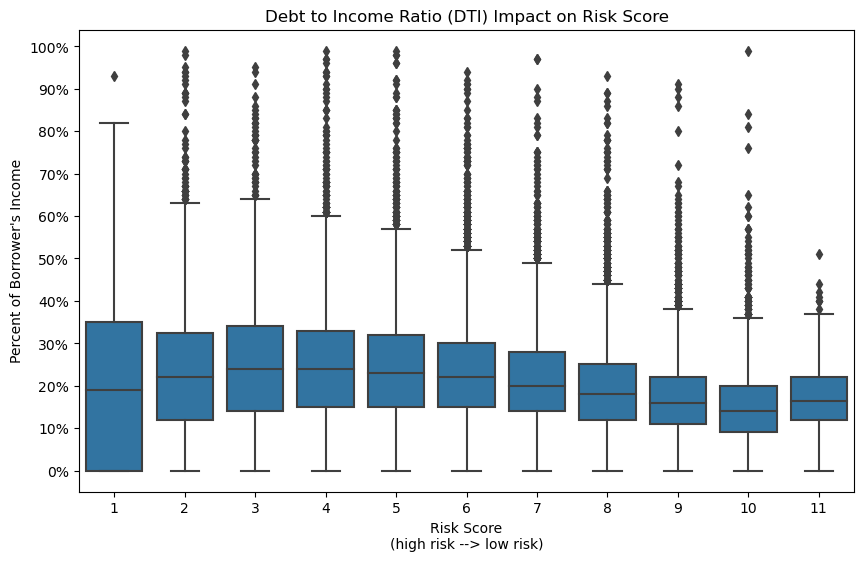

In [133]:
#set plot layout
fig, ax = plt.subplots(figsize=(10, 6))

#create plot
ax = sns.boxplot(data=prosper_updated,  x='risk_score', y='debt_income_ratio', color=sns.color_palette()[0]);

#plot attributes
plt.title('Debt to Income Ratio (DTI) Impact on Risk Score')
plt.xlabel('Risk Score\n(high risk --> low risk)')
plt.ylabel('Percent of Borrower\'s Income')
y_ticks = np.arange(0, 1.1, .1) #create ticks on y axis
y_labels = [str(int(i * 100)) + '%' for i in y_ticks] #format ticks
plt.yticks(y_ticks, y_labels)

plt.show()

While the Interquartile Range (IQR) ranges are similar with similar means across the dataset, there is a gradual reduction in DTI as we move from more risk to less risk (left to right) as well as a gradual reduction in those above the max. The most risky (1), I find very interesting as the IQR spans the entirity of all the other scores. I'm thinking if a Borrower receives a 1 risk score, their DTI isn't involved in that particular calculation and other factors led to them receiving a 1 since DTI apparently carry a lot of weight (just for scores of 1). On the flip side, the least risky (11), bucks the trend of decreasing DTI and mean DTI. They also have very few above the max when compared to all others. From this, it leads one to believe that if a Borrower wants the best risk score, in regards to DTI, they can have a high DTI, however the odds slightly increase the lower your DTI and the absolute best (11), cannot have a DTI over ~.55.

##### Proser Risk Score against Open lines of credit

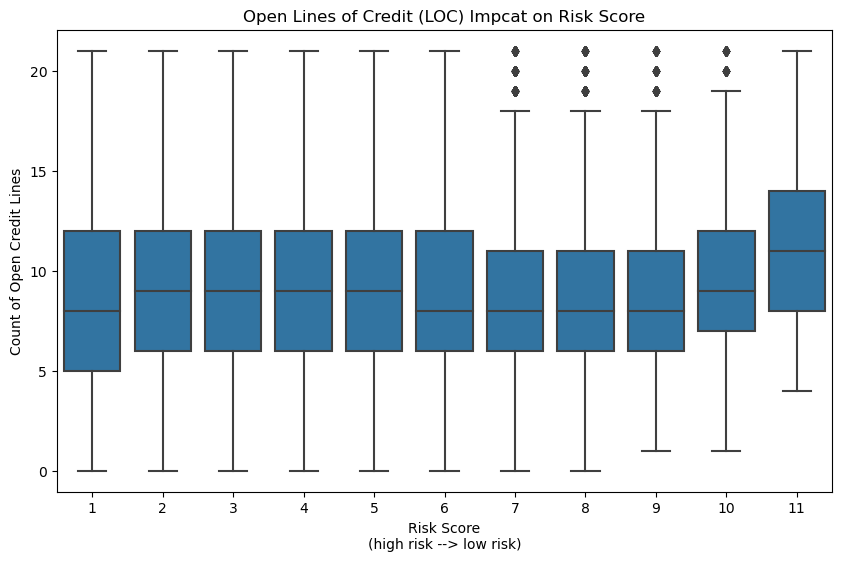

In [134]:
#set plot layout
fig, ax = plt.subplots(figsize=(10, 6))

#create plot
ax = sns.boxplot(data = prosper_updated,  x='risk_score', y='open_loc', color=sns.color_palette()[0]);

#plot attributes
plt.title('Open Lines of Credit (LOC) Impcat on Risk Score')
plt.xlabel('Risk Score\n(high risk --> low risk)')
plt.ylabel('Count of Open Credit Lines')

plt.show()

Open lines of credit does't appear to have a large standalone impact on risk score until you get towards the end of the least risk Borrowers (9 - 11). During the univariate plot, I wondered if a borrower could have too many open LOCs, but this plot shows that is not the case. In fact, more is better. To get the best risk scores, a Borrower must have at least 1 or 2 open lines of credit and if a Borrower wants the absolute best score, having a minimum of 4 credit lines looks to be a requirement and it's all good if the Borrower has a higher than average amount.   

##### Proser Risk Score against Revolving credit balance

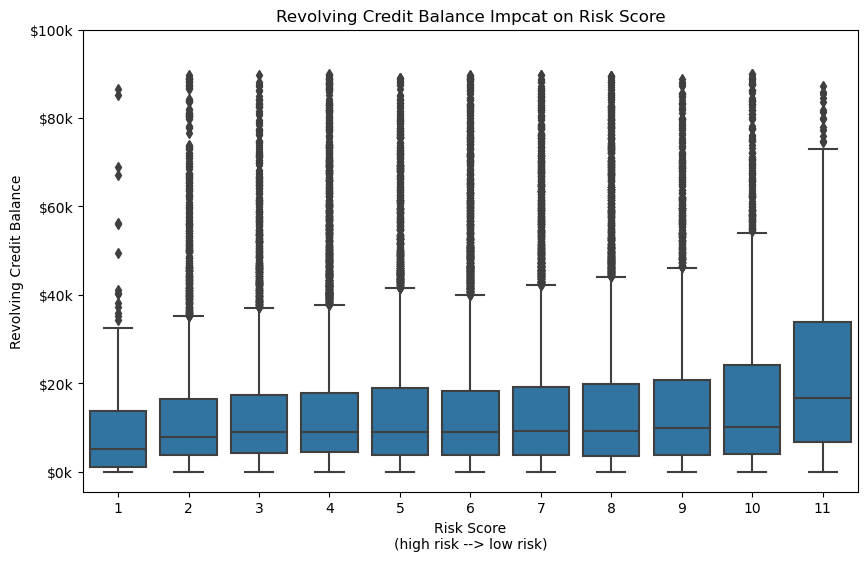

In [135]:
#set plot layout
fig, ax = plt.subplots(figsize=(10, 6))

#create plot
ax = sns.boxplot(data = prosper_updated,  x='risk_score', y='revolving_credit_bal', color=sns.color_palette()[0]);

#plot attributes
plt.title('Revolving Credit Balance Impcat on Risk Score')
plt.xlabel('Risk Score\n(high risk --> low risk)')
plt.ylabel('Revolving Credit Balance')
y_ticks = np.arange(0, 120000, 20000) #create ticks on x axis
y_labels = ['$' + str(i // 1000) + 'k' for i in y_ticks] #format ticks
plt.yticks(y_ticks, y_labels)

plt.show()

Much like the previous plots, Revolving credit balance doesn't have a huge impact on risk score as a stand alone metric, except towards the extremes. Overall, there is a slight increase in the total range of credit balance, IQR, and max value as risk moves from highest risk to least risk (left to right). The absolute best score (11), is more extreme in that those Borrowers look to have quite a bit more revolving crdit balance than anyone else. From this, if a Borrower wants the best risk scores, having a higher revolving credit balance will help their case.   

On a side note, this goes hand in hand with what we saw in the open lines of credit plot; those with more open lines of credit will have a better chance of receiving the best risk scores. It stands to reason, too, that having more open lines of credit will also have larger amounts of revolving credit balance and therefore, from the open lines of credit plot, we could forecast what this revolving credit balance plot would look like. 

To see this relationship better, I'll do an additional plot below, though it's not directly related to our question of 'how do the different metrics impact Prosper's risk score.

##### Open Lines of Credit and Revolving Credit Balance Relationship

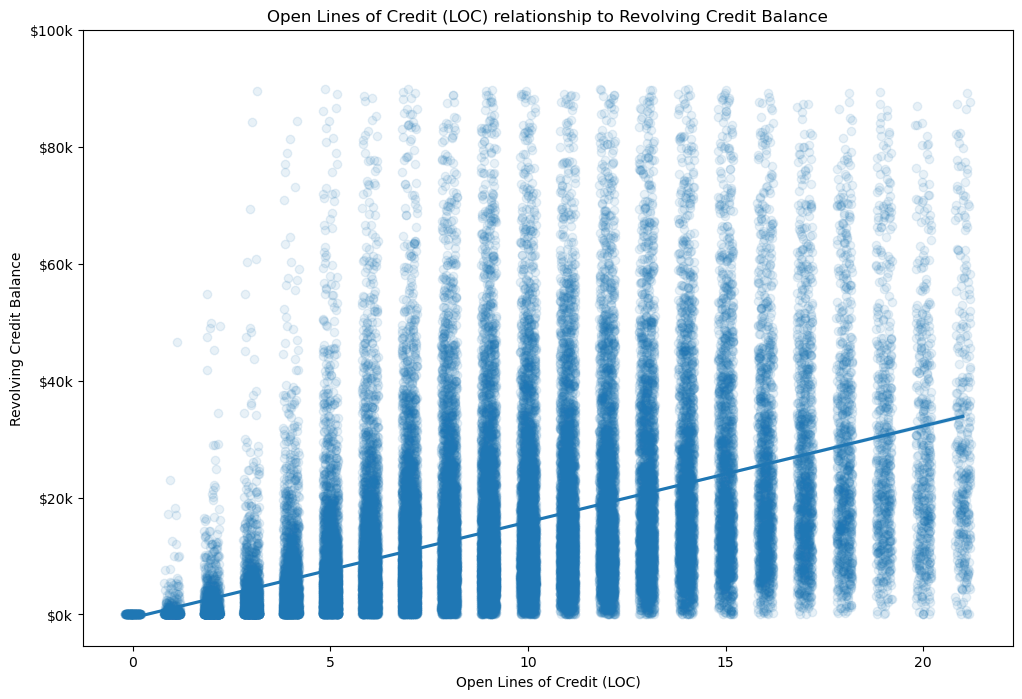

In [136]:
#set plot layout
fig, ax = plt.subplots(figsize=(12, 8))

#create plot
ax = sns.regplot(data=prosper_updated, x='open_loc', y='revolving_credit_bal', x_jitter=0.2, scatter_kws={'alpha':1/10})

#plot attributes
plt.title('Open Lines of Credit (LOC) relationship to Revolving Credit Balance')
plt.xlabel('Open Lines of Credit (LOC)')
plt.ylabel('Revolving Credit Balance')
y_ticks = np.arange(0, 120000, 20000) #create ticks on x axis
y_labels = ['$' + str(i // 1000) + 'k' for i in y_ticks] #format ticks
plt.yticks(y_ticks, y_labels)

plt.show()

This is more interesting than expected. It does show there are higher revolving credit balances as more lines of credit are available, however the bulk of credit balances is more in the middle. Also, it shows that no matter how few lines of credit a borrower has open (if starting at 3), the balances are just as high as those with over 20, albeit not as many. 

##### Proser Risk Score against Monthly Income

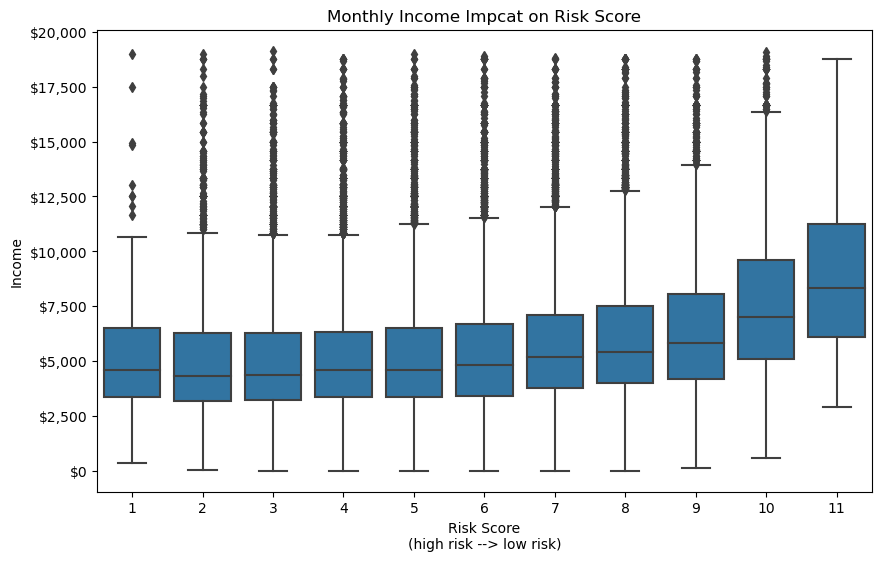

In [137]:
#set plot layout
fig, ax = plt.subplots(figsize=(10, 6))

#create plot
ax = sns.boxplot(data = prosper_updated,  x='risk_score', y='monthly_income', color=sns.color_palette()[0]);

#plot attributes
plt.title('Monthly Income Impcat on Risk Score')
plt.xlabel('Risk Score\n(high risk --> low risk)')
plt.ylabel('Income')
y_ticks = np.arange(0, 22500, 2500) #create ticks on y axis
y_labels = ['$' + str(f'{i:,d}') for i in y_ticks] #format ticks
plt.yticks(y_ticks, y_labels)

plt.show()

This is the most straightforward bivariate plot yet. A Borrower's risk score gets better as their monthly income increases. This is very intuitive and expected. It also shows there is a much steeper minimum for the absolute best score, ~\$3k a month. One thing I find interesting is the most risky score (1) actually has a very slighly higher minimum monthly income and monthly average income. It's not much, but still a bit odd. Borrowers with a 1 score also don't have many high income earners, however, this is not surprising. From this plot, it's pretty clear that if a Borrower wants the best risk scores, make more money.  

##### Proser Risk Score against Credit Score

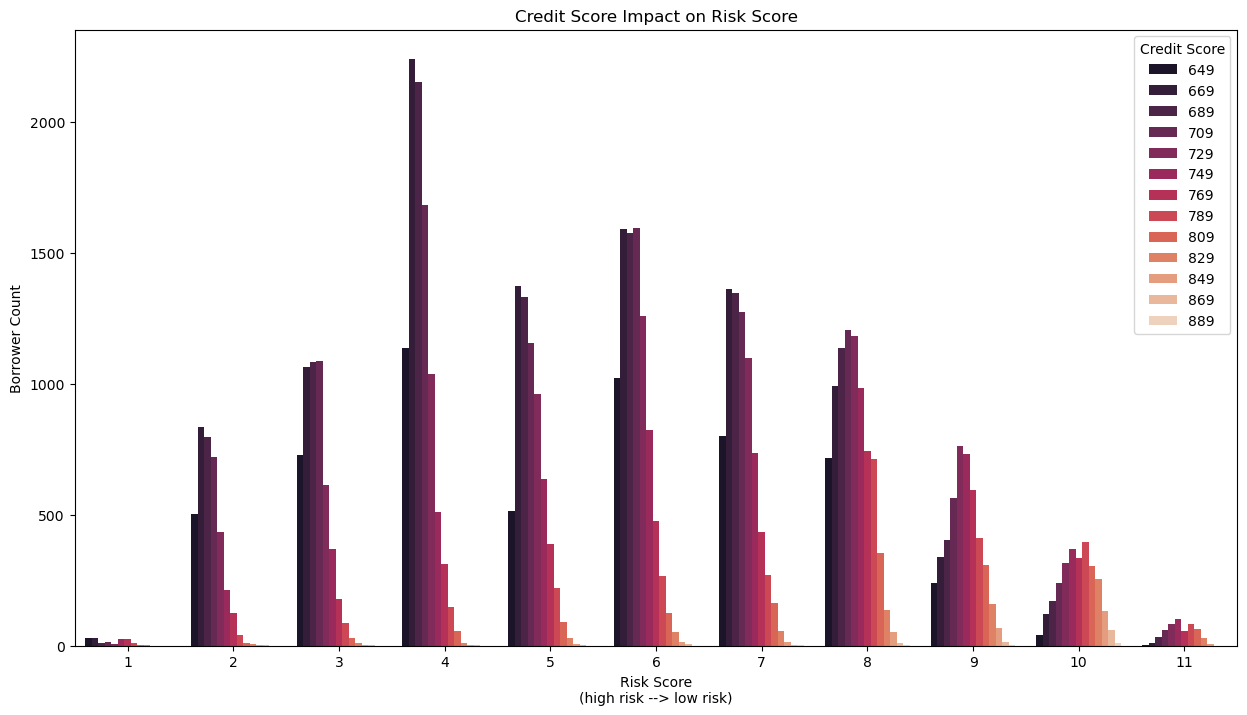

In [138]:
#set plot layout
fig, ax = plt.subplots(figsize=(15, 8))

#create plot
ax = sns.countplot(data=prosper_updated, x='risk_score', hue='credit_score', palette='rocket')

#plot attributes
plt.title('Credit Score Impact on Risk Score')
plt.xlabel('Risk Score\n(high risk --> low risk)')
plt.ylabel('Borrower Count')
plt.legend(title='Credit Score')

plt.show()

This is a little hard to discern much due to the number of credit score buckets. Visually, I think using the 769 credit bucket score as a cutoff, it may be a little easier to see what this tells us with scores under that figure and scores including and above that figure.

In [139]:
#create first subset for plot
lower_half_subset = prosper_updated.loc[prosper_updated['credit_score'] < 769]
#create second subset for plot
upper_half_subset = prosper_updated.loc[prosper_updated['credit_score'] >= 769]

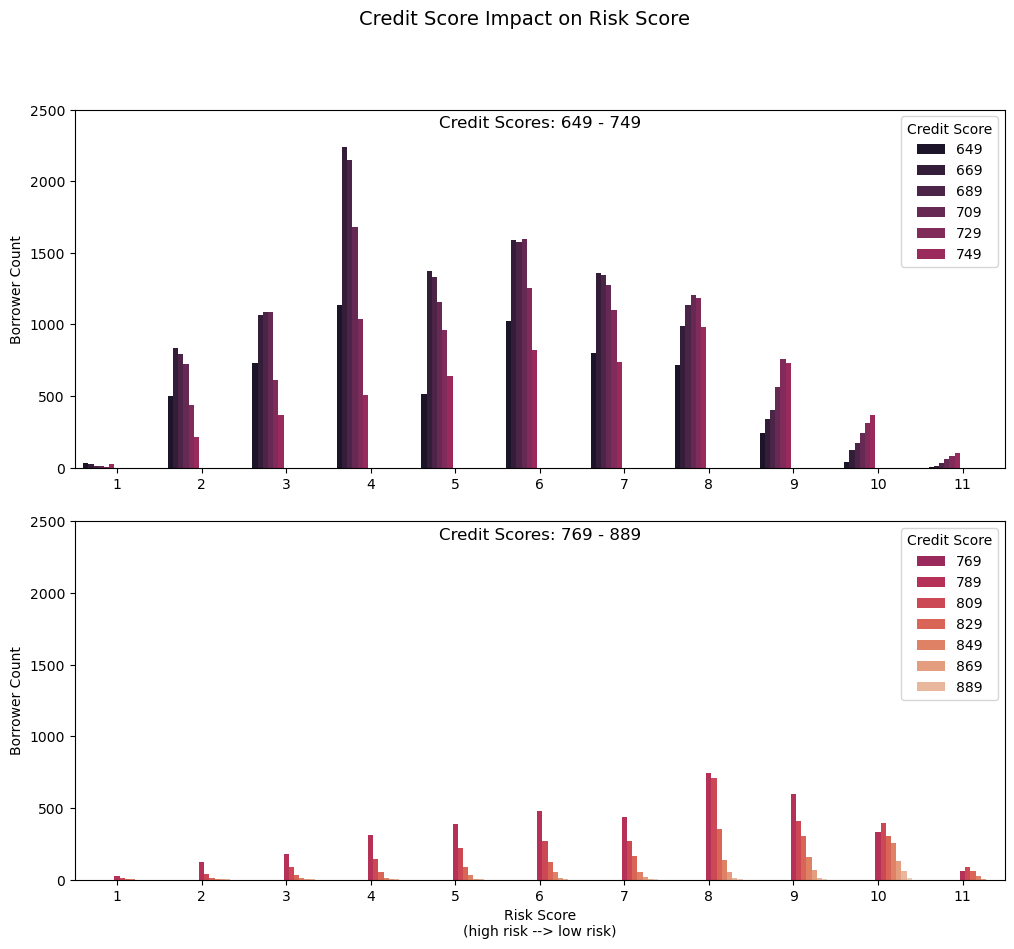

In [140]:
#set plot layout
fig, ax = plt.subplots(figsize=(12, 10))
fig.suptitle('Credit Score Impact on Risk Score', fontsize=14)
plt.subplots_adjust(hspace=0.15)

#create plot 1
plt.subplot(2, 1, 1)
ax = sns.countplot(data=lower_half_subset, x='risk_score', hue='credit_score', palette='rocket')

#plot attributes
plt.ylim(0, 2500)
plt.title('')
ax.annotate('Credit Scores: 649 - 749', xy=(0.5, 0.95), xycoords='axes fraction', fontsize=12, ha='center')
plt.legend(title='Credit Score', labels=['649', '669', '689', '709', '729', '749'])
plt.xlabel('')
plt.ylabel('Borrower Count')


#set position and create plot 2
plt.subplot(2, 1, 2)
ax = sns.countplot(data=upper_half_subset, x='risk_score', hue='credit_score', palette='rocket')

#plot 2 attributes
plt.ylim(0, 2500)
plt.title('')
ax.annotate('Credit Scores: 769 - 889', xy=(0.5, 0.95), xycoords='axes fraction', fontsize=12, ha='center')
plt.legend(title='Credit Score', labels=['_Hidden label', '_Hidden label', '_Hidden label', '_Hidden label', '_Hidden label',
                                         '769', '789', '809', '829', '849', '869', '889'])
plt.xlabel('Risk Score\n(high risk --> low risk)')
plt.ylabel('Borrower Count')

# Show the plots
plt.show()

Splitting the plot into 2 plots helps in viewing the data. All risk scores have Borrowers with all credit ratings. However, in general, there are far more borrowers with lower credit scores (top plot) than higher (bottom plot). Also, in regards to the lower credit score view, as Borrower's risk scores improve, the count of borrowers gets smaller. This makes sense, as a Borrower's credit rating gets better, they'd most likely have a better risk score too. And this is shown with the higher credit scores plot. As risk scores improve, borrowers with higher credit scores increase. However, this pattern stops with a risk score of 9 and above. For scores 9 - 11, the distribution is more normalized. A borrower has just about an equal shot of getting a favorable risk score with lower credit as they do with higher credit. This leads me to believe two things, one: at the best risk scores (9 - 11), credit rating isn't weighted as heavily and two: there simply are just fewer Borrowers overall with the highest scores so fewer data points for trends to present.

It's also worth noting that the lowest credit score for Prosper is 649, which is considered 'good' credit, so we're really looking at a distribution of high credit scores in general. From this plot, if a Borrower wants the best risk scores, it helps to have a better credit score, however it's not entirely necessary.

### This concludes Bivariate analysis

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The greatest impact to Prosper's risk rating appears to be monthly income and credit score, which does make sense. Whenever anyone applies for a loan, anywhere, income and credit score are always the first two questions. That said, I wouldn't have been surprised if those metrics had more of an impact as some borrowers with the lowest credit scores found themselves with the best risk rating and a handful with the highest credit scores found themselves in the riskiest category. Plotting these all together (in multivariate) will provide the best insight. 

> One additional thing I found interesting throughout was the risk score of 11. The score did track with expectation, the values required to receive that score were typically better than the previous scores, but not always as one would think. The requirements seemed far more narrow and in some cases, it seemed the values did not, in fact, need to be all that much better. It seems to me, and this is just speculation, that the risk score of 11 was or is experimental. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The only features I looked into that was not primary to the main investigation was the relationship between open lines of credit and revolving credit balance. As I stated in that summary above, the relationship was mostly what I expected, but I did find it less straightforward. More than anything, it pointed out people certainly like to spend money!



## Multivariate Exploration

In multivariate analysis, I'll first take a look at Prosper's risk score plotted against all the varialbes together. That should indicate if there really is any one or two variables that impacts risk score more than others. If so, I'll take a deeper look into that relationship. Also, as a "bonus" investigation, I'm curious to see how the risk score translates not only into the components of an approved loan, but the return on investement for Investors. After all, Prosper is a P2P loan model and Investors are a very key player. I'll look into the below:

* Prosper Risk Score to Debt to Income Ratio (DTI), Open Lines of Credit (LOC), Revolving Credit Balance, Monthly Income, and Credit Score
* Prosper Risk Score to whichever of the two above show the highest correlation
* Prosper Risk Score to Borrower APR, Estimated_return, Loan Amount, and Term

First, a look at all our variables.

##### Correlations between Prosper Risk Score, Debt to Income Ratio, Open LOC, Revolving Credit Balance, Monthiy Income, Credit Score 

I'll create the matrix first to view the correlations via code, then plot.

In [141]:
#create correlation matrix
prosper_updated_corr = prosper_updated[['risk_score','debt_income_ratio','open_loc','revolving_credit_bal',
                                       'monthly_income','credit_score']].corr()
#view matrix
prosper_updated_corr

,risk_score,debt_income_ratio,open_loc,revolving_credit_bal,monthly_income,credit_score
risk_score,1.000000,-0.169150,-0.015272,0.053098,0.209257,0.347799
debt_income_ratio,-0.169150,1.000000,0.359176,0.219028,-0.240007,-0.017095
open_loc,-0.015272,0.359176,1.000000,0.449059,0.230726,0.119113
revolving_credit_bal,0.053098,0.219028,0.449059,1.000000,0.332496,0.074833
monthly_income,0.209257,-0.240007,0.230726,0.332496,1.000000,0.146406
credit_score,0.347799,-0.017095,0.119113,0.074833,0.146406,1.000000


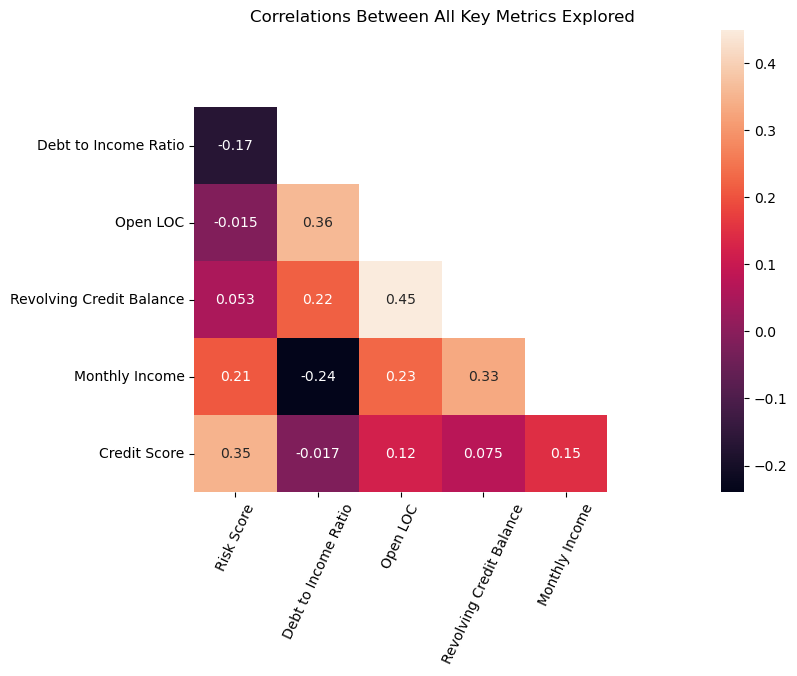

In [142]:
#set plot layout
fig, ax = plt.subplots(figsize=(8, 6))

#define plot arguments
mask = np.triu(np.ones_like(prosper_updated_corr.corr()))
x_labels = ['Risk Score', 'Debt to Income Ratio', 'Open LOC', 'Revolving Credit Balance', 'Monthly Income']
y_labels = ['Debt to Income Ratio', 'Open LOC', 'Revolving Credit Balance', 'Monthly Income', 'Credit Score']

#create plot
ax = sns.heatmap(data = prosper_updated_corr, cmap='rocket', annot = True, mask=mask);

#plot attributes
plt.title('Correlations Between All Key Metrics Explored')
plt.xticks(ticks=np.arange(len(prosper_updated_corr.columns) - 1) + 0.5, labels=x_labels, rotation=65)
plt.yticks(ticks=np.arange(1, len(prosper_updated_corr.columns)) + 0.5, labels=y_labels)
plt.show()

Really no surprises here and assumptions made during Bivariate analysis prove out. Credit score and monthly income do have the highest impact, but not so much that the other variables are completely useless. Although, open lines of credit don't seem to matter a whole lot and therefore, something that is highly correlated to lines of credit also is not overly correlated to risk score and that is revolving credit balance. In other observations, the highest correlated metrics in the entire plot are between open lines of credit and revolving credit balance, which we saw earlier in Bivariate as well. 

We'll now "zoom in" on the two highest correlations relating to Prosper risk score: credit score and monthly income.  

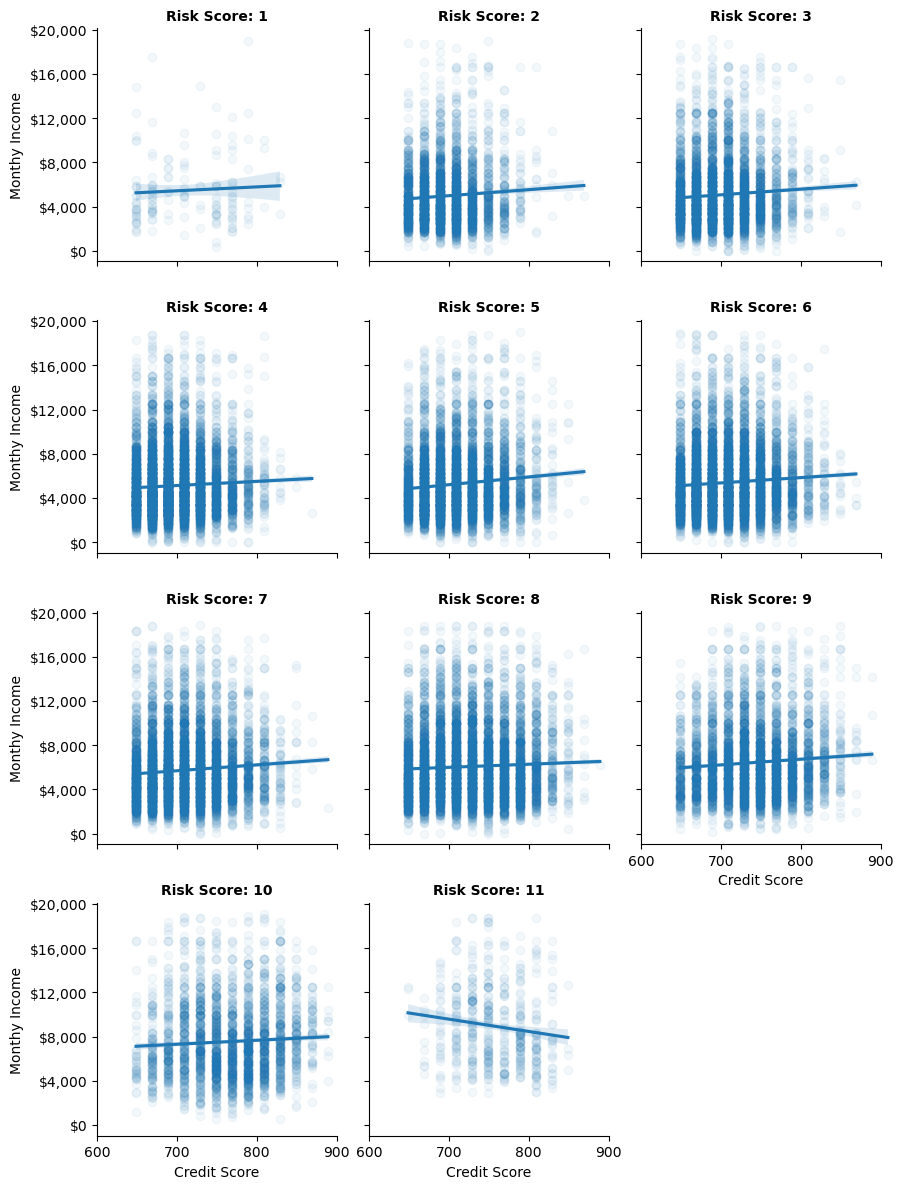

In [143]:
#set plot layout

#create plot/grid
g = sns.FacetGrid(data=prosper_updated, col ="risk_score", col_wrap=3)

#map scatter to grid
g.map(sns.regplot, 'credit_score', 'monthly_income', scatter_kws={'alpha':1/20})

#plot attributes
g.set_titles(col_template='Risk Score: {col_name}', fontweight='bold', fontsize=8)
g.set(xlim=(600, 900))
g.set_xlabels('Credit Score')
g.set_ylabels('Monthy Income')
y_ticks = np.arange(0, 24000, 4000) #create ticks on y axis
y_labels = ['$' + str(f'{i:,d}') for i in y_ticks] #format ticks
plt.yticks(y_ticks, y_labels)

plt.show()

Progressing through each risk score, we don't see any earth shattring variations at a glance. Monthly incomes do, slightly, increase as credit scores increase and even more slighly, as risk score gets better. We also see the right edge of the dark mass slightly migrate towards higher credit scores as risk score increases (Borrowers becoming less risky). That makes sense as those with less risk would have a higher credit score. The bulk of the monthly income, for all scores, is in the lower half of the plots. After all, not many people make over \\$100k a year.

One thing I also want to call out, once again, is the risk score 11. It's the only one that has a negative correlation. That really doesn't make a lot of sense and would warrant furhter investigation, time permitting. 

To see if we can get a better perspective, I'll try a different plot.

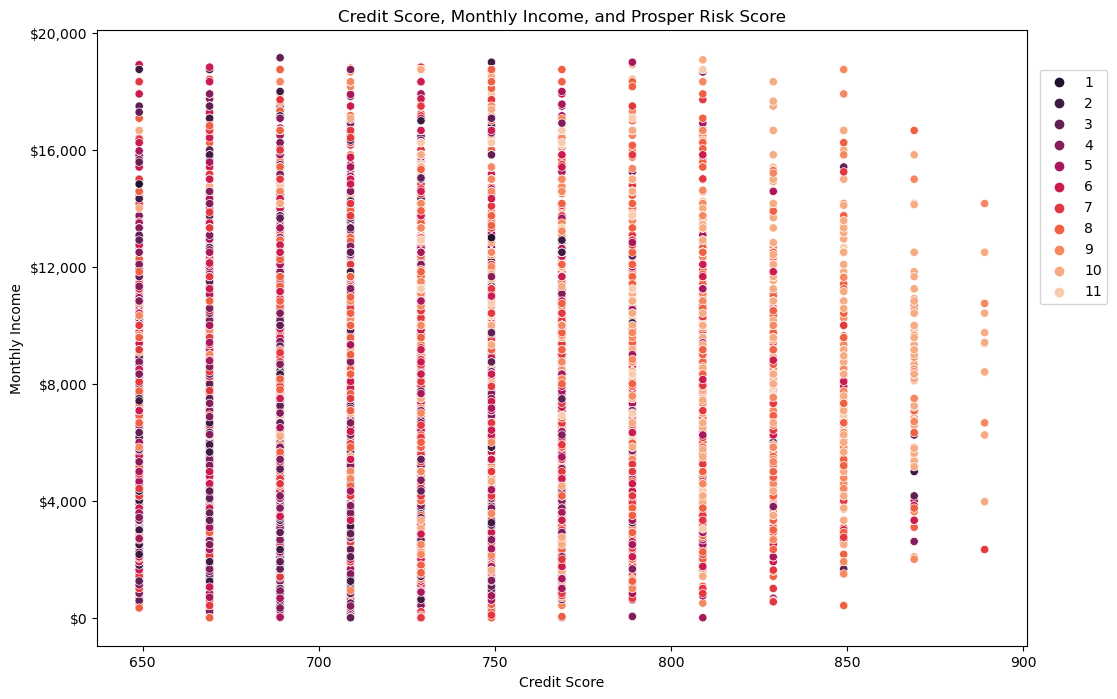

In [144]:
#set plot layout
fig, ax = plt.subplots(figsize=(12, 8))

#create plot
ax = sns.scatterplot(data=prosper_updated, x='credit_score', y='monthly_income', hue='risk_score', palette='rocket')

#plot attributes
plt.title('Credit Score, Monthly Income, and Prosper Risk Score')
plt.legend(loc='center', bbox_to_anchor=(1.05, .745))
plt.xlabel('Credit Score')
plt.ylabel('Monthly Income')
y_ticks = np.arange(0, 24000, 4000) #create ticks on y axis
y_labels = ['$' + str(f'{i:,d}') for i in y_ticks] #format ticks
plt.yticks(y_ticks, y_labels)

plt.show()

This view actually does show things a little clearer. The riskiest Borrowers (darker dots) are lumped on the left side of the plot, where the lower credit scores are. And slightly tucked more towards the lower monthly income. Then as we move towards higher credit scores, we see a shift to the lower risk borrowers (lighter dots), but angular as well, towards higher income. I find this plot far more useful and tells a better story. To boot, it also shows that we have far fewer Borrowers with exceptional credit scores, which one could glean from the facetplot, but not quite as obvious.

### Secondary Investigation

I was curious how Prosper's risk score impacted approved loans and more specifically, the impact to the estimated return for an Investor . I'll do some real quick plots to look into this. A quick disclaimer, I did not do any cleaning or column manipulation on the loan columns.

In [145]:
#view the datafram
prosper_updated.head()

,borrower_apr,current_delinquencies,debt_income_ratio,estimated_return,loan_amount,open_loc,risk_score,revolving_credit_bal,monthly_income,term,credit_score
0,0.12016,0,0.18,0.05470,10000,14,7,3989,6125.00,36,689
1,0.12528,4,0.15,0.06000,10000,5,9,1444,2875.00,36,809
2,0.15425,0,0.36,0.07077,15000,17,10,62999,8333.33,60,749
3,0.31032,0,0.27,0.11070,3000,7,2,5812,2083.33,36,689
4,0.23939,0,0.24,0.09840,10000,6,4,1260,3355.75,36,709


I'll first check the correlations and focus on the most relevant columns to the risk score and estimated return.

In [146]:
#create a List of loan related columns to view correlations
prosper_updated_corr_loan = prosper_updated[['risk_score','borrower_apr','estimated_return','loan_amount', 'term']].corr()
#view df
prosper_updated_corr_loan

,risk_score,borrower_apr,estimated_return,loan_amount,term
risk_score,1.000000,-0.625281,-0.327251,0.264112,0.023234
borrower_apr,-0.625281,1.000000,0.827391,-0.447440,-0.077718
estimated_return,-0.327251,0.827391,1.000000,-0.326622,0.128626
loan_amount,0.264112,-0.447440,-0.326622,1.000000,0.346531
term,0.023234,-0.077718,0.128626,0.346531,1.000000


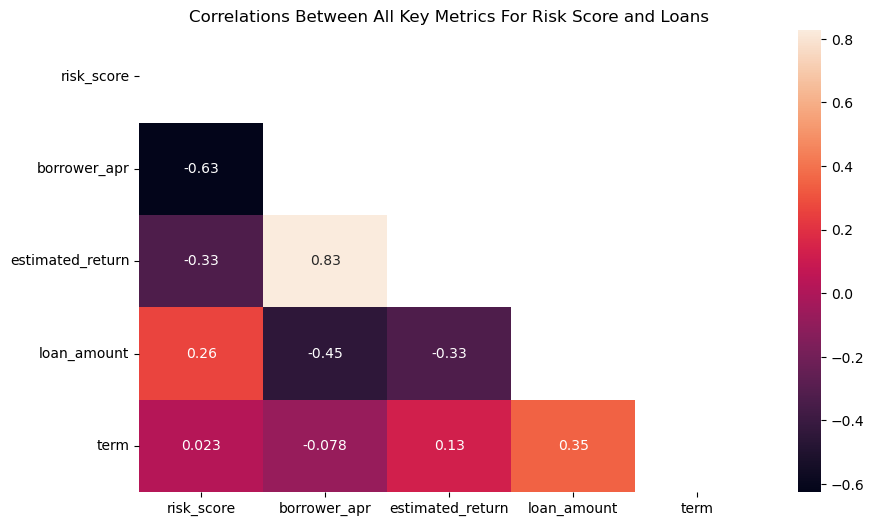

In [147]:
#set plot layout
fig, ax = plt.subplots(figsize=(10, 6))

#define plot arguments
mask = np.triu(np.ones_like(prosper_updated_corr_loan.corr()))

#create plot
ax = sns.heatmap(data = prosper_updated_corr_loan, cmap='rocket', annot=True, mask=mask);

#plot attributes
plt.title('Correlations Between All Key Metrics For Risk Score and Loans')

plt.show()

The data points, excepting term, are all pretty highly related to one another which I'd expect; the selected metrics are all commonly associated with loans. Risk score specifically is highly correlated with all, except term. Estimated return shows similar corrleationas as risk score in regards to import, so for that reason, I'll omit term, but keep everything else when doing further analysis. 

A scatter plot should show these relationships well. Since this entire project revolves around the Prosper risk score and this specific deep dive is about estimated return, I'll plot both those variables for sure and I'll also add APR since APR is a key metric when dealing with loans and returns.

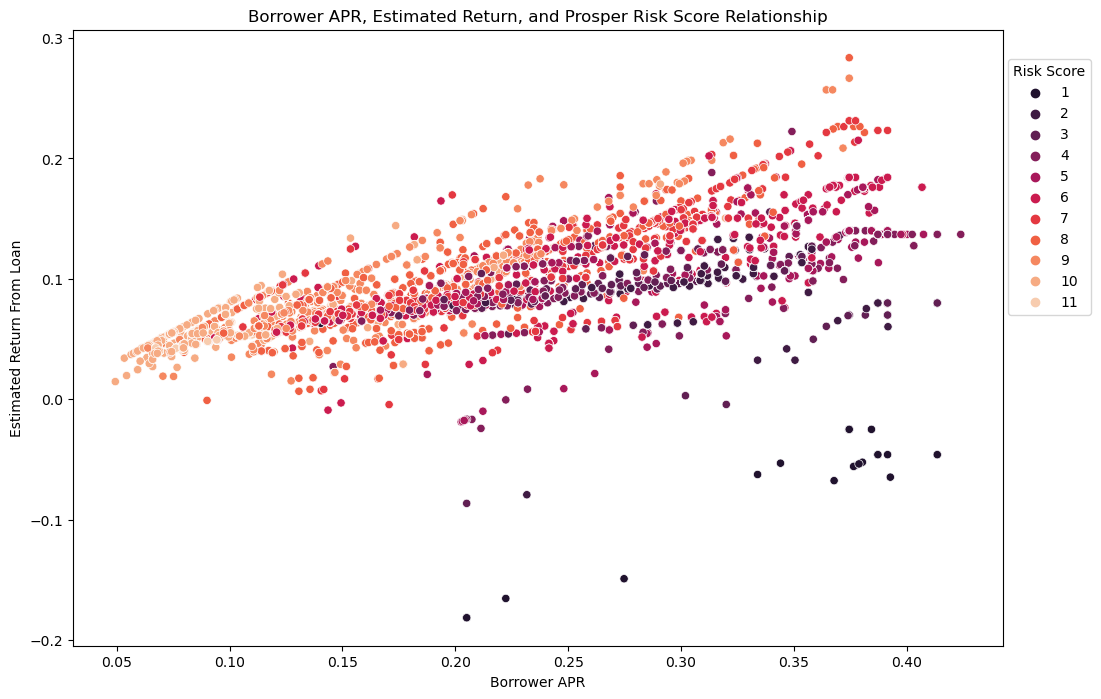

In [148]:
#set plot layout
fig, ax = plt.subplots(figsize=(12, 8))

#create plot
ax = sns.scatterplot(data=prosper_updated, x='borrower_apr', y='estimated_return', hue='risk_score', palette='rocket')

#plot attributes
plt.title('Borrower APR, Estimated Return, and Prosper Risk Score Relationship')
plt.legend(loc='center', bbox_to_anchor=(1.05, .745), title='Risk Score')
plt.xlabel('Borrower APR')
plt.ylabel('Estimated Return From Loan')

plt.show()

There are a handful of data points with a negative return. I have a hard time believeing a loan would be approved for potential Investors to invest in if it was forecasted to lose money. For that reason, I will remove loans below a zero estimated return.

In [149]:
#filter out negative returns
estimated_return_subset = prosper.loc[prosper['estimated_return'] > 0]

In [150]:
#update estimated return column
prosper_updated = estimated_return_subset.reset_index(drop=True)

In [151]:
#confirm updated dataframe
prosper_updated['estimated_return'].describe()

count    61037.000000
mean         0.095420
std          0.028637
min          0.002900
25%          0.074630
50%          0.090500
75%          0.114700
max          0.283700
Name: estimated_return, dtype: float64

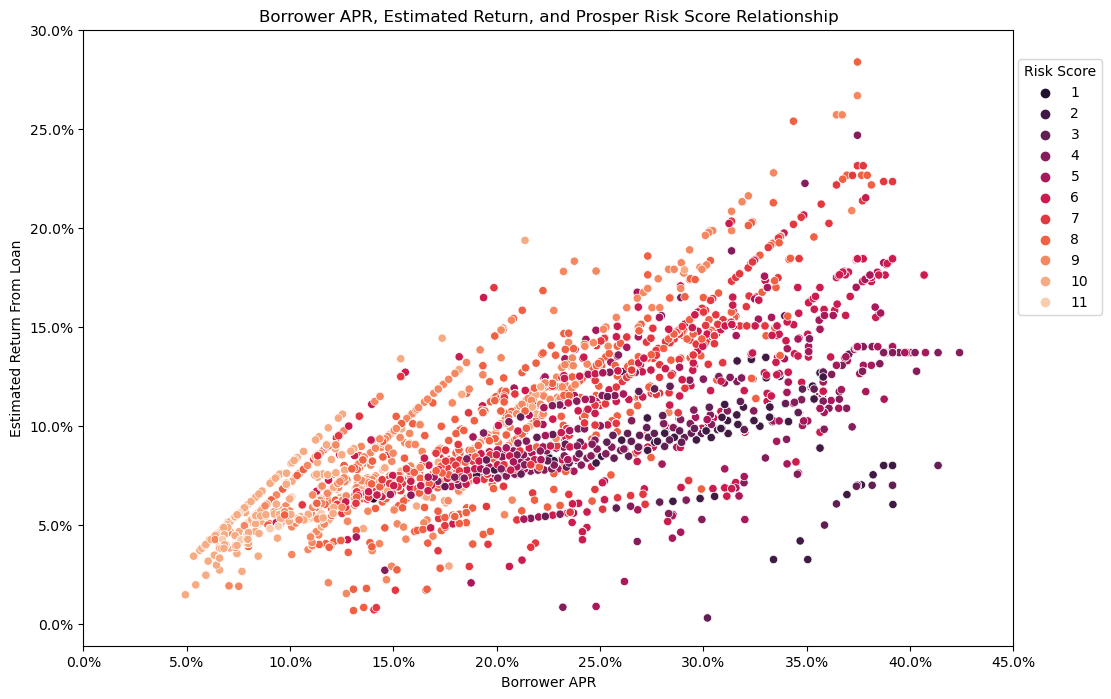

In [152]:
#set plot layout
fig, ax = plt.subplots(figsize=(12, 8))

#create plot
ax = sns.scatterplot(data=prosper_updated, x='borrower_apr', y='estimated_return', hue='risk_score', palette='rocket')

#plot attributes
plt.title('Borrower APR, Estimated Return, and Prosper Risk Score Relationship')
plt.legend(loc='center', bbox_to_anchor=(1.05, .745), title='Risk Score')
plt.xlabel('Borrower APR')
plt.xticks(np.arange(0, prosper_updated['borrower_apr'].max() + .05, .05))
x_tick_loc, _ = plt.xticks() #get tick locations, ignore lables
x_labels = [str((i * 100).round(1)) + '%' for i in x_tick_loc] #format ticks
plt.xticks(x_tick_loc, x_labels)
plt.ylabel('Estimated Return From Loan')
plt.yticks(np.arange(0, prosper_updated['estimated_return'].max() + .05, .05))
y_tick_loc, _ = plt.yticks() #get tick locations, ignore lables
y_labels = [str((i * 100).round(1)) + '%' for i in y_tick_loc] #format ticks
plt.yticks(y_tick_loc, y_labels)

plt.show()

This plot shows lower risk Borrowers (higher risk score number/lighter dots) have much better APRs (the lighter dots occupy the left side of the plot). The estimated return is lower for these loans as well. Higher risk Borrowers have far higher APRs and the estimated return on their loans is also higher. The layout makes sense as higher risk customer's have a higher risk of defaulting on a loan and therefore, the return percentage needs to be higher as well to make up for defaults. This, however, doesn't make a lot of sense from Prosper's perspective. I think the company would want a forecast with more of a level return, regardless of risk.

Because of this, my guess is the estimated return is in reality pretty balanced across the board. For this hypothesis to be true, we'd need to see larger loan amounts on loans that have a lower APR. Since estimated return is a percentage and not a dollar amount, a lower percentage return on a higher loan amount would be similar to a higher percentage return on a lower loan amount.

To see if this is true, we need to add loan amount to the plot.

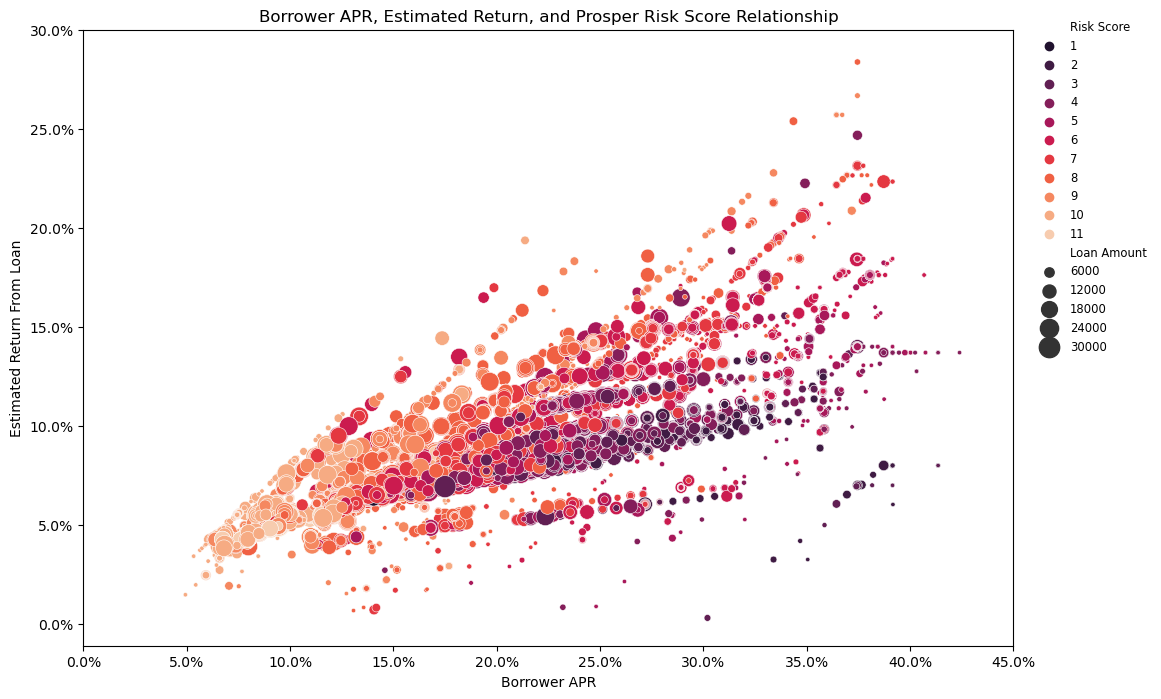

In [153]:
#set plot layout
fig, ax = plt.subplots(figsize=(12, 8))

#create plot
ax = sns.scatterplot(data=prosper_updated, x='borrower_apr', y='estimated_return', hue='risk_score',
                     size='loan_amount', sizes=(10, 250), palette='rocket')

#plot attributes
plt.title('Borrower APR, Estimated Return, and Prosper Risk Score Relationship')
legend = plt.legend(loc='center', bbox_to_anchor=(1.085, .745),
                    frameon=False, fontsize='small')
legend.texts[0].set_text('Risk Score') #legend title for risk score
legend.texts[12].set_text('Loan Amount') #legend title for loan amount
plt.xlabel('Borrower APR')
plt.xticks(np.arange(0, prosper_updated['borrower_apr'].max() + .05, .05))
x_tick_loc, _ = plt.xticks() #get tick locations, ignore lables
x_labels = [str((i * 100).round(1)) + '%' for i in x_tick_loc] #format ticks
plt.xticks(x_tick_loc, x_labels)
plt.ylabel('Estimated Return From Loan')
plt.yticks(np.arange(0, prosper_updated['estimated_return'].max() + .05, .05))
y_tick_loc, _ = plt.yticks() #get tick locations, ignore lables
y_labels = [str((i * 100).round(1)) + '%' for i in y_tick_loc] #format ticks
plt.yticks(y_tick_loc, y_labels)

plt.show()

Though a 4 variable plot is a tad messy, it does support the hypothesis of an Investor's forecasted return on investment is going to be somewhat level no matter which loans they decide to support, low risk or high risk. We see the largest amount loans (biggest dots) are indeed with the lower APR/lower risk customers and as we progress to higher APR/more risky Borrowers, the loan amounts are smaller (smaller dots), but the estimated return percentage is larger to compensate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> The mulitvariate exploration essentially confirmed the bivariate analysis. Credit score and Monthly Income had the most impact to Prosper's risk score. I do want to add that they didn't have such an overwhelming impact that no other variable matters. Had I been able to plot many of the other 81 variables, I'd imagine the impact correlation would be lessened. Ultimately, I think the variables work together to form the score with a small measure of weight favored to some variables. Another thing this particular exploration showed deals with the variables I used to look at risk score impact; what their relationship was with each other. There were some high correlations among the variables such as open lines of credit and revolving credit balance and also open lines of credit and debt to income ratio then also debt to income ratio and monthly income. None of these relationships are surprising and are intuitive, but it was kind of cool to see the interworkings of them via plotting. 

### Were there any interesting or surprising interactions between features?
> The most interesting discovery was the second 'bonus' plot. The only surprising finding within this exploration was the length of the loan, or term, didn't have a lot of impact on really any of the other variables (loan length was decently correlated) that were loan related. The interesting part, though, was that I had made some assumptions about how the loans must work in regards to estimated return. After adding the loan amount variable to the plot, my assumptions proved out. It was really cool to see that confirmed on the final plot.  

## Conclusions
>This was a very fun and enlightening exercise. The cleaning took the majority of the time, which, I'm learning, is how it works in the real world. I could have even spent more time cleaning and more time preparing the data to delve into more analysis, but for the parameters of the project, there was no need.

>The analysis phase ultimately answered the main question: what impacts Prosper's risk score and additionally, to what degree. As mentioned before, the typical elements one would expect all had an impact on the risk score, but they all contribute in their own way. I would love to know the actual algorithm used to calculate the risk score. Some things that were a little surprising (explained throughout this analysis) didn't have much to do with the primary question, which I'm guessing is pretty common in Data Analysis. 

>Additioaly, if there was more time, looking at other variables to see the impact on risk score would be beneficial. And doing some deeper research on why Prosper uses credit score buckets rather than actual credit scores. My guess is a bucket would even out the playing field a little more and prevent that particular variable from being too impactful, but more research would be needed.

>All in all, it was a good exercise that really put my beginner skills to the test. I had to do a ton of additional research into coding and in doing so, I came across several, extremely complex, things one can do when perfomring EDA. I have a long ways to go still!
